In [16]:
import json
from EdgeGPT.EdgeGPT import Chatbot, ConversationStyle

with open('./cookie.json', 'r') as f:
    cookies = json.load(f)

async def message_bot(message, style=ConversationStyle.balanced):
    bot = await Chatbot.create(cookies=cookies)
    response = await bot.ask(prompt=message, conversation_style=style, simplify_response=True)
    await bot.close()
    return response

async def message_existing_bot(bot, message, style = ConversationStyle.balanced):
    response = await bot.ask(prompt=message, conversation_style=style, simplify_response=True)
    return response

async def create_bot():
    bot = await Chatbot.create(cookies=cookies)
    return bot

In [1]:
len('''A depiction of the aftermath of the cyclone extratropical that hit Rio Grande do Sul on August 20th, 2023. The image shows the destruction caused by the cyclone in Rio Grande and other municipalities. In the foreground, we see people trying to rebuild their homes and businesses. In the background, we see a concert poster announcing Almir Sater\'s return to Porto Alegre  with his new tour. The poster is hanging on a wall that is still standing amidst the destruction. In the sk''')

479

### Testing response from Bing

In [7]:
response = await message_bot('''Sumarize as últimas notícias do dia 25/07/2023 do Rio Grande do Sul apenas.
Seja eclético quanto ao tipo de notícia, eu gostaria de um resumo com uma visão geral das notícias de todas as áreas de todos os jornais que encontrar.''')
response

{'text': 'Olá! Seguem as últimas notícias do Rio Grande do Sul em 25/07/2023:\n\n- O ciclone vai atuar bem próximo à costa da Região Sul, entre o Uruguai e o sul gaúcho[^2^].\n- O Rio Grande do Sul deve enfrentar chuvas intensas até a manhã de quarta-feira (26), conforme aviso do Instituto Nacional de Meteorologia (Inmet)[^5^].\n- Homem é preso após atacar três pessoas com motosserra em Porto Alegre, diz polícia. De acordo com a investigação, suspeito tem 24 anos. Polícia vai requisitar um laudo médico para atestar as condições de saúde mental do homem. Há 2 dias[^4^].\n- Entenda por que o RS terá passagem de um terceiro ciclone em menos de um mês[^3^].\n\nEspero que isso ajude! Se você precisar de mais informações ou tiver alguma dúvida, por favor me avise.',
 'author': 'bot',
 'sources': '[1]: https://g1.globo.com/rs/rio-grande-do-sul/noticia/2023/07/25/grupo-do-g1-rs-no-whatsapp.ghtml "Veja como participar do grupo do g1 RS no WhatsApp e receba as notícias ..."\n[2]: https://agorano

### Testing image generation

In [3]:
from EdgeGPT.ImageGen import ImageGen
import json

# Load auth cookie
with open('./cookie.json', encoding="utf-8") as file:
    cookie_json = json.load(file)
    for cookie in cookie_json:
        if cookie.get("name") == "_U":
            U = cookie.get("value")
            break

# Create image generator
image_generator = ImageGen(U)
image_generator.save_images(
    image_generator.get_images("Logo G3 AI News"),
    output_dir='./images_generated/',
)

Sending request...
ERROR: <!DOCTYPE html><html dir="ltr" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:Web="http://schemas.live.com/Web/"><script type="text/javascript" nonce="F0/oOZuVjyHsvf/nSNimrzRrauL/k1bnea19g3VwgHE=" >//<![CDATA[
si_ST=new Date
//]]></script><head><!--pc--><title>Logo G3 AI News - Image Creator from Microsoft Bing</title><meta content="text/html; charset=utf-8" http-equiv="content-type" /><meta name="referrer" content="origin-when-cross-origin" /><meta property="og:description" content="Intelligent search from Bing makes it easier to quickly find what you’re looking for and rewards you." /><meta property="og:site_name" content="Bing" /><meta property="og:title" content="Logo G3 AI News - Bing" /><meta property="og:url" content="https://www.bing.com/images/create?q=Logo G3 AI News&amp;rt=3&amp;FORM=GENCRE" /><meta property="fb:app_id" content="570810223073062" /><meta property="og:image" content="http://www.bing.com/sa/simg/facebook_sharing_5.p

Exception: Redirect failed

### Testing with prompt of news

In [17]:
bot = await create_bot()
news_rs = await message_existing_bot(bot, '''Sumarize as últimas notícias do dia 25/07/2023 do Rio Grande do Sul apenas.
Seja eclético quanto ao tipo de notícia, eu gostaria de um resumo com uma visão geral das notícias de todas as áreas de todos os jornais que encontrar.''')
news_rs

{'text': 'Olá! Seguem as últimas notícias do Rio Grande do Sul em 25/07/2023:\n\n- O ciclone vai atuar bem próximo à costa da Região Sul, entre o Uruguai e o sul gaúcho[^2^].\n- O Rio Grande do Sul deve enfrentar chuvas intensas até a manhã de quarta-feira (26), conforme aviso do Instituto Nacional de Meteorologia (Inmet)[^5^].\n- Homem é preso após atacar três pessoas com motosserra em Porto Alegre, diz polícia. De acordo com a investigação, suspeito tem 24 anos. Polícia vai requisitar um laudo médico para atestar as condições de saúde mental do homem. Há 2 dias[^4^].\n- Entenda por que o RS terá passagem de um terceiro ciclone em menos de um mês[^3^].\n\nEspero que isso ajude! Se você precisar de mais informações ou tiver alguma dúvida, é só me perguntar.',
 'author': 'bot',
 'sources': '[1]: https://g1.globo.com/rs/rio-grande-do-sul/noticia/2023/07/25/grupo-do-g1-rs-no-whatsapp.ghtml "Veja como participar do grupo do g1 RS no WhatsApp e receba as notícias ..."\n[2]: https://agoranor

In [19]:
print(news_rs['text'])
print(news_rs['sources'])

Olá! Seguem as últimas notícias do Rio Grande do Sul em 25/07/2023:

- O ciclone vai atuar bem próximo à costa da Região Sul, entre o Uruguai e o sul gaúcho[^2^].
- O Rio Grande do Sul deve enfrentar chuvas intensas até a manhã de quarta-feira (26), conforme aviso do Instituto Nacional de Meteorologia (Inmet)[^5^].
- Homem é preso após atacar três pessoas com motosserra em Porto Alegre, diz polícia. De acordo com a investigação, suspeito tem 24 anos. Polícia vai requisitar um laudo médico para atestar as condições de saúde mental do homem. Há 2 dias[^4^].
- Entenda por que o RS terá passagem de um terceiro ciclone em menos de um mês[^3^].

Espero que isso ajude! Se você precisar de mais informações ou tiver alguma dúvida, é só me perguntar.
[1]: https://g1.globo.com/rs/rio-grande-do-sul/noticia/2023/07/25/grupo-do-g1-rs-no-whatsapp.ghtml "Veja como participar do grupo do g1 RS no WhatsApp e receba as notícias ..."
[2]: https://agoranors.com/rs/ "Leia as últimas notícias do Rio Grande d

In [20]:
message = f'''Aqui estão algums notícias do Rio Grande do Sul de hoje: {news_rs["sources"]}. Eu gostaria que você criasse um prompt em inglês para a geração de imagens baseadas nessas notícias. Exemplos de prompts bons são: ```Examples of high-quality prompts for a stunning close-up photorealistic illustration of Ana de Armas for text-to-image models (Stable Diffusion, midjourney, or Dalle2) are:

- "A dreamy, vibrant portrait of Ana de Armas; aesthetically pleasing anime style, trending on popular art platforms, minutely detailed, with precise, sharp lines, a composition that qualifies as an award-winning illustration, presented in 4K resolution, inspired by master artists like Eugene de Blaas and Ross Tran, employing a vibrant color palette, intricately detailed."

- "A portrait exuding Alberto Seveso and Geo2099's distinctive styles; an ultra-detailed and hyper-realistic portrayal of Ana de Armas, designed with Lisa Frank aesthetics, featuring popular art elements such as butterflies and florals, sharp focus, akin to a high-quality studio photograph, with meticulous detailing, made famous by artists such as Tvera, Wlop, and Artgerm."```
Seguindo as técnicas utilizadas nesses exemplos, crie um prompt de uma imagem que englobe todas as notícias citadas. Responda com apenas o prompt.'''
news_prompt = await message_existing_bot(bot, message)
news_prompt['text']

'Here\'s a prompt for you: "A digital art piece that captures the essence of the latest news in Rio Grande do Sul on July 25th, 2023. The piece should include a depiction of the cyclone that is expected to hit the coast of the region, the heavy rain that is forecasted by the National Institute of Meteorology (Inmet), and the arrest of a man who attacked three people with a chainsaw in Porto Alegre. The piece should be highly detailed and realistic, with vibrant colors and intricate details that capture the essence of each event. The final product should be presented in 4K resolution and be inspired by master artists like Eugene de Blaas and Ross Tran."'

In [21]:
parsed_prompt = news_prompt['text'].split('"')[-2]
parsed_prompt

'A digital art piece that captures the essence of the latest news in Rio Grande do Sul on July 25th, 2023. The piece should include a depiction of the cyclone that is expected to hit the coast of the region, the heavy rain that is forecasted by the National Institute of Meteorology (Inmet), and the arrest of a man who attacked three people with a chainsaw in Porto Alegre. The piece should be highly detailed and realistic, with vibrant colors and intricate details that capture the essence of each event. The final product should be presented in 4K resolution and be inspired by master artists like Eugene de Blaas and Ross Tran.'

Generating the images

In [22]:
image_generator.save_images(
    image_generator.get_images(parsed_prompt),
    output_dir='./images_generated/',
)

Sending request...
Waiting for results...
.......


### Creating utility functions for image generation

In [35]:
from EdgeGPT.ImageGen import ImageGen
import json
import os

# Load auth cookie
with open('./cookie.json', encoding="utf-8") as file:
    cookie_json = json.load(file)
    for cookie in cookie_json:
        if cookie.get("name") == "_U":
            U = cookie.get("value")
            break

# Create image generator
image_generator = ImageGen(U)

async def create_image(prompt, output_dir = './images_generated/'):
    existing_images = list(os.listdir('./images_generated'))
    image_generator.save_images(
        image_generator.get_images(prompt),
        output_dir=output_dir,
    )
    new_images = list(set(os.listdir(output_dir)) - set(existing_images))
    new_images = [os.path.join(output_dir, filename) for filename in new_images]
    return new_images

Testing it

Sending request...
Waiting for results...
......................


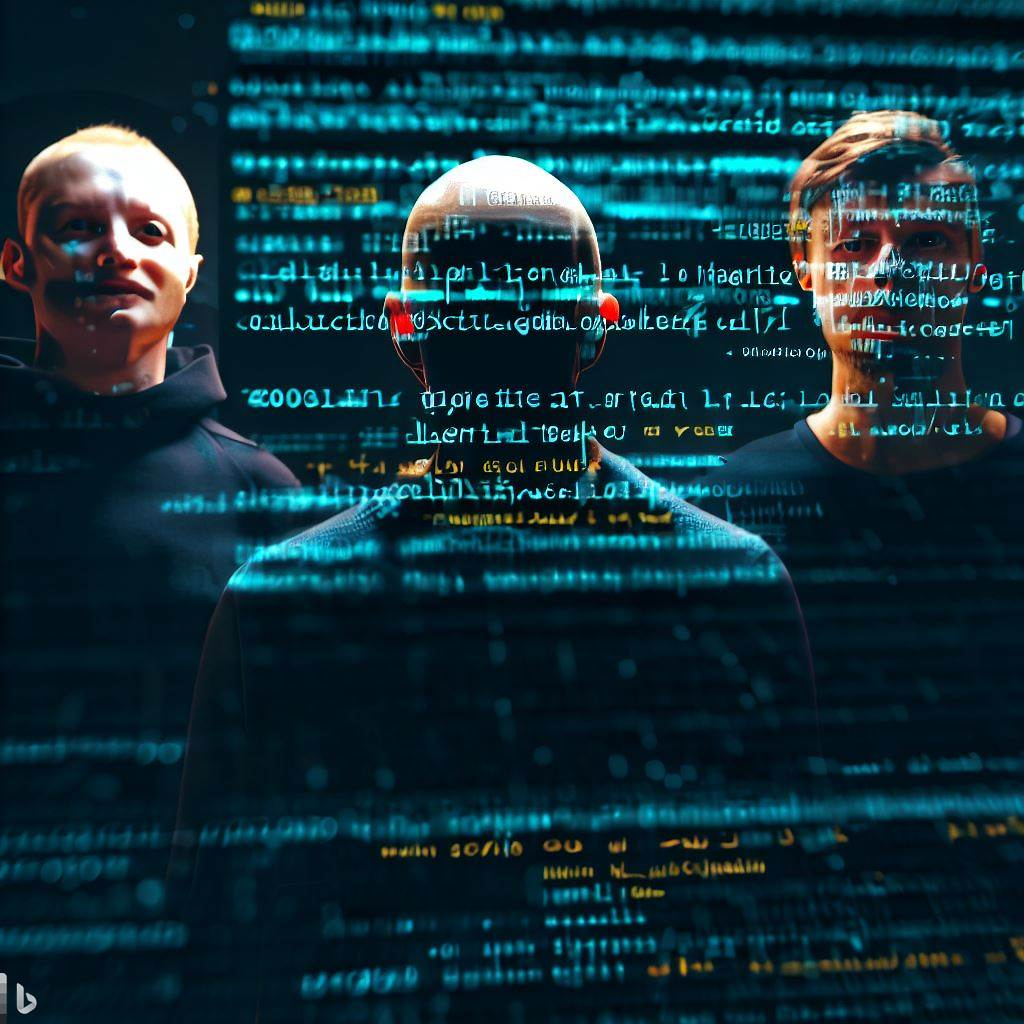

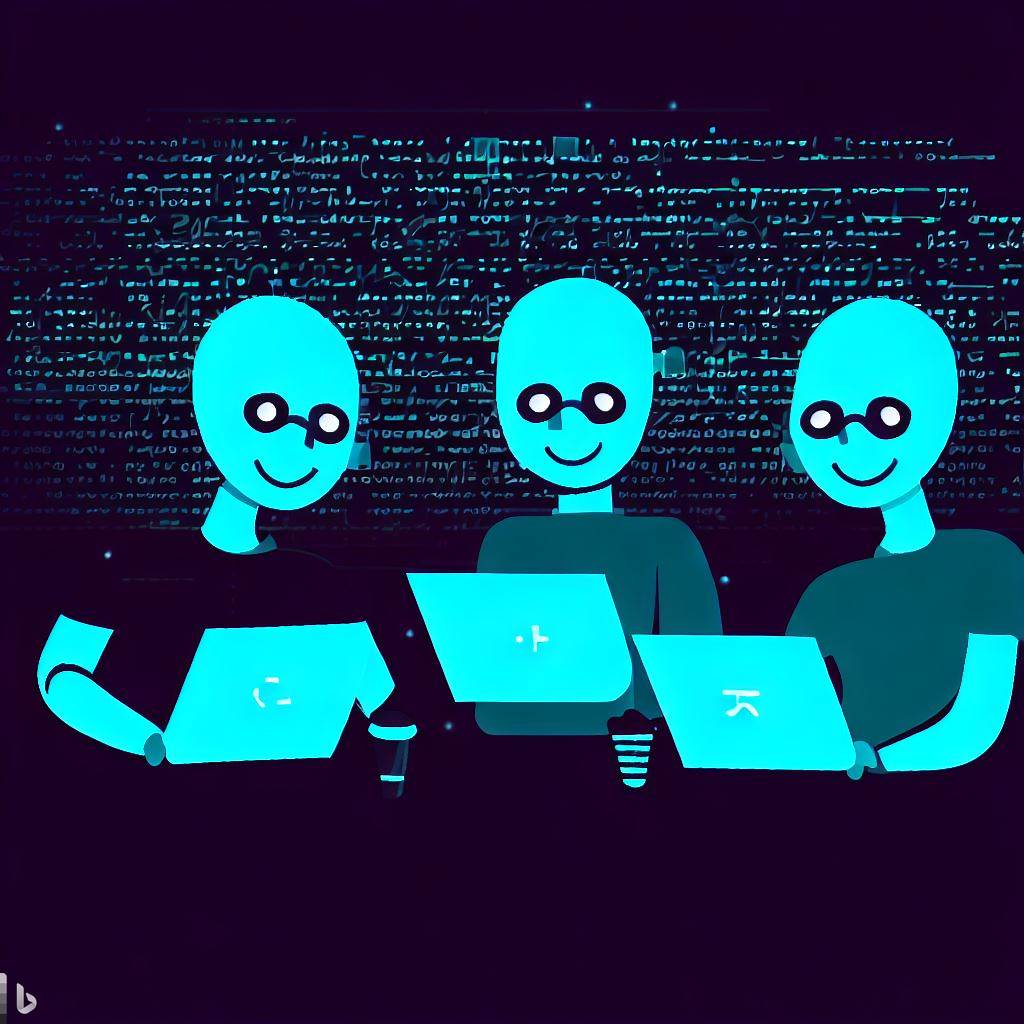

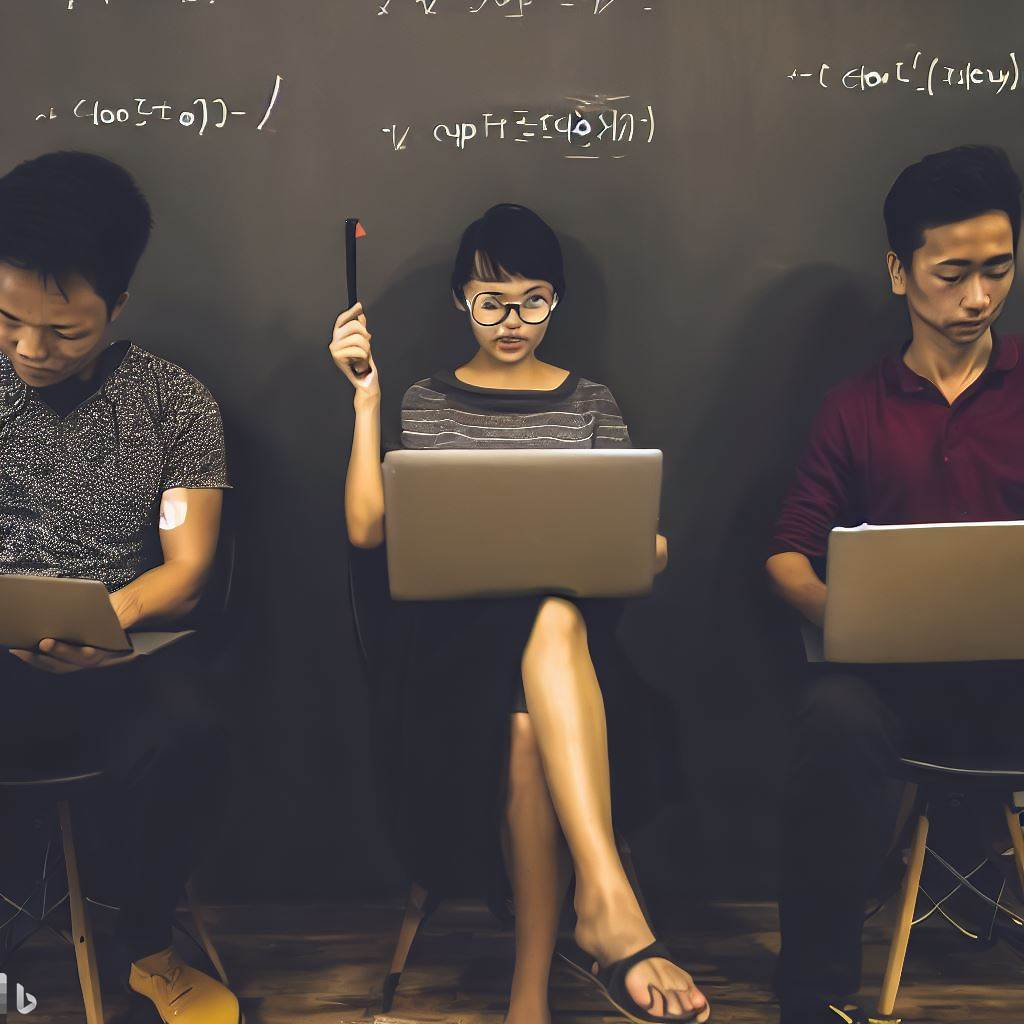

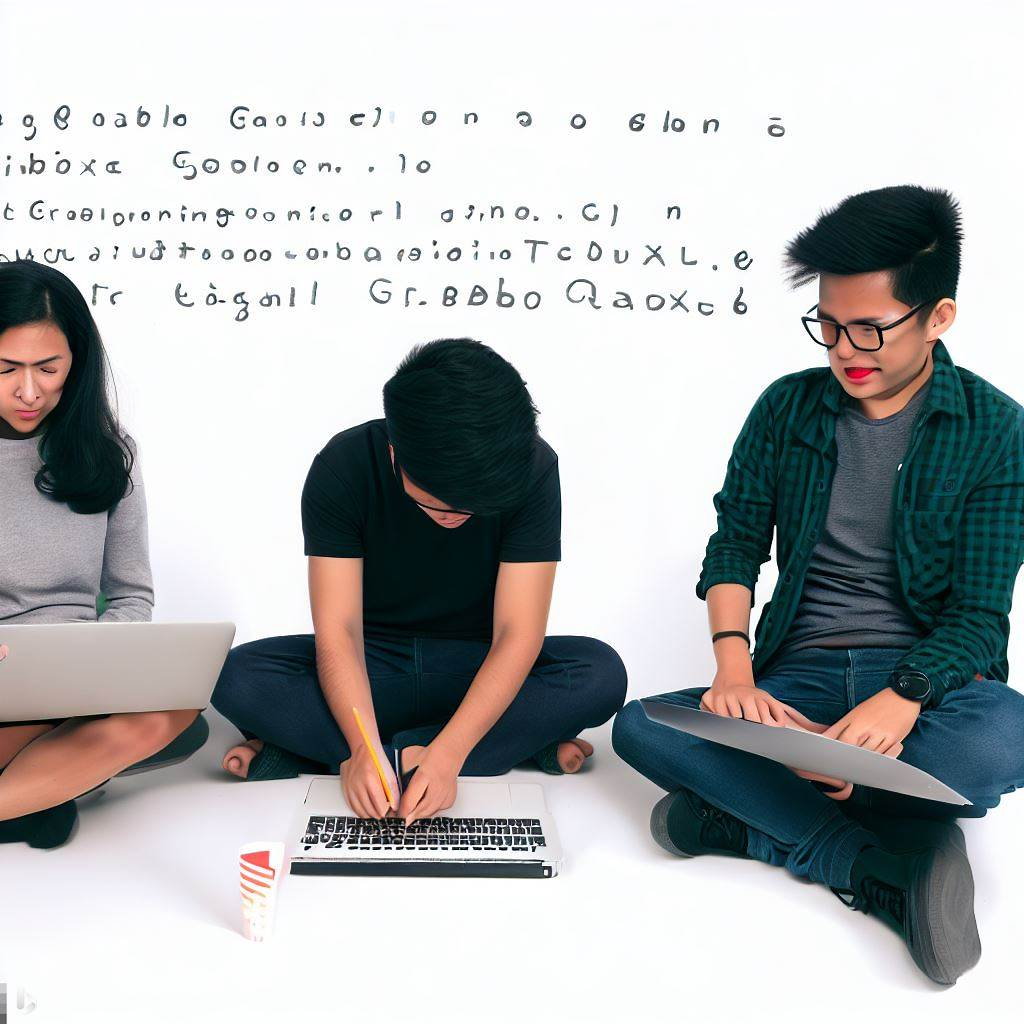

In [24]:
from IPython.display import Image, display
new_images = await create_image('3 humans called Gabriel, Gabriel and Gabriela writing code for creating art')
for image_path in new_images:
    display(Image(filename=image_path))

### Trying to force bing to respond in json format

In [25]:
message = f'''Aqui estão algums notícias do Rio Grande do Sul de hoje: {news_rs["sources"]}. Eu gostaria que você criasse um prompt em inglês para a geração de imagens baseadas nessas notícias. Exemplos de prompts bons são: ```Examples of high-quality prompts for a stunning close-up photorealistic illustration of Ana de Armas for text-to-image models (Stable Diffusion, midjourney, or Dalle2) are:

- "A dreamy, vibrant portrait of Ana de Armas; aesthetically pleasing anime style, trending on popular art platforms, minutely detailed, with precise, sharp lines, a composition that qualifies as an award-winning illustration, presented in 4K resolution, inspired by master artists like Eugene de Blaas and Ross Tran, employing a vibrant color palette, intricately detailed."

- "A portrait exuding Alberto Seveso and Geo2099's distinctive styles; an ultra-detailed and hyper-realistic portrayal of Ana de Armas, designed with Lisa Frank aesthetics, featuring popular art elements such as butterflies and florals, sharp focus, akin to a high-quality studio photograph, with meticulous detailing, made famous by artists such as Tvera, Wlop, and Artgerm."```
Seguindo as técnicas utilizadas nesses exemplos, crie um prompt de uma imagem que englobe todas as notícias citadas. Responda com apenas o prompt, em um dicionário do python contendo a key "prompt" e com o value dessa key sendo o prompt.'''
news_prompt_json = await message_existing_bot(bot, message)
news_prompt_json['text']

'Here\'s the prompt you requested:\n```python\n{\n    "prompt": "A digital art piece that captures the essence of the latest news in Rio Grande do Sul on July 25th, 2023. The piece should include a depiction of the cyclone that is expected to hit the coast of the region, the heavy rain that is forecasted by the National Institute of Meteorology (Inmet), and the arrest of a man who attacked three people with a chainsaw in Porto Alegre. The piece should be highly detailed and realistic, with vibrant colors and intricate details that capture the essence of each event. The final product should be presented in 4K resolution and be inspired by master artists like Eugene de Blaas and Ross Tran."\n}\n```'

In [31]:
news_prompt_json['text'].split('prompt":')[-1].split('}')[0]

' "A digital art piece that captures the essence of the latest news in Rio Grande do Sul on July 25th, 2023. The piece should include a depiction of the cyclone that is expected to hit the coast of the region, the heavy rain that is forecasted by the National Institute of Meteorology (Inmet), and the arrest of a man who attacked three people with a chainsaw in Porto Alegre. The piece should be highly detailed and realistic, with vibrant colors and intricate details that capture the essence of each event. The final product should be presented in 4K resolution and be inspired by master artists like Eugene de Blaas and Ross Tran."\n'

### Creating general parse function

In [32]:
def parse_prompt_from_bot_response(bot_response):
    prompt = bot_response['text'].split('prompt":')[-1].split('}')[0]
    return prompt

### Testing whole pipeline

In [39]:
import datetime
from loguru import logger
async def generate_brazilian_state_images(brazilian_state):
    logger.info(f'Creating Bot...')
    bot = await create_bot()
    logger.success(f'Bot Created!')
    logger.info(f'Getting news for {brazilian_state}, for date {datetime.date.today()}')
    news = await message_existing_bot(bot, f'''Sumarize as últimas notícias do dia {datetime.date.today()} do {brazilian_state} apenas.
    Seja eclético quanto ao tipo de notícia, eu gostaria de um resumo com uma visão geral das notícias de todas as áreas de todos os jornais que encontrar.''')
    logger.success(f'News report created!')
    logger.info(f'Getting prompt for the news...')
    message = f'''Aqui estão algums notícias do {brazilian_state} de hoje: {news["sources"]}. Eu gostaria que você criasse um prompt em inglês para a geração de imagens baseadas nessas notícias. Exemplos de prompts bons são: ```Examples of high-quality prompts for a stunning close-up photorealistic illustration of Ana de Armas for text-to-image models (Stable Diffusion, midjourney, or Dalle2) are:

    - "A dreamy, vibrant portrait of Ana de Armas; aesthetically pleasing anime style, trending on popular art platforms, minutely detailed, with precise, sharp lines, a composition that qualifies as an award-winning illustration, presented in 4K resolution, inspired by master artists like Eugene de Blaas and Ross Tran, employing a vibrant color palette, intricately detailed."

    - "A portrait exuding Alberto Seveso and Geo2099's distinctive styles; an ultra-detailed and hyper-realistic portrayal of Ana de Armas, designed with Lisa Frank aesthetics, featuring popular art elements such as butterflies and florals, sharp focus, akin to a high-quality studio photograph, with meticulous detailing, made famous by artists such as Tvera, Wlop, and Artgerm."```
    Seguindo as técnicas utilizadas nesses exemplos, crie um prompt de uma imagem que englobe todas as notícias citadas. Responda com apenas o prompt, em um dicionário do python contendo a key "prompt" e com o value dessa key sendo o prompt.'''
    prompt_response = await message_existing_bot(bot, message)
    prompt = parse_prompt_from_bot_response(prompt_response)
    logger.success(f'Image prompt created!')
    logger.info(f'Creating images...')
    new_images = await create_image(prompt)
    for image_path in new_images:
        display(Image(filename=image_path))
    return news, new_images

2023-07-25 21:53:20.770 | INFO     | __main__:generate_brazilian_state_images:4 - Creating Bot...
2023-07-25 21:53:21.877 | SUCCESS  | __main__:generate_brazilian_state_images:6 - Bot Created!
2023-07-25 21:53:21.878 | INFO     | __main__:generate_brazilian_state_images:7 - Getting news for Rio Grande do Sul, for date 2023-07-25
2023-07-25 21:53:39.155 | SUCCESS  | __main__:generate_brazilian_state_images:10 - News report created!
2023-07-25 21:53:39.156 | INFO     | __main__:generate_brazilian_state_images:11 - Getting prompt for the news...
2023-07-25 21:53:48.762 | SUCCESS  | __main__:generate_brazilian_state_images:20 - Image prompt created!
2023-07-25 21:53:48.763 | INFO     | __main__:generate_brazilian_state_images:21 - Creating images...


Sending request...
Waiting for results...
........


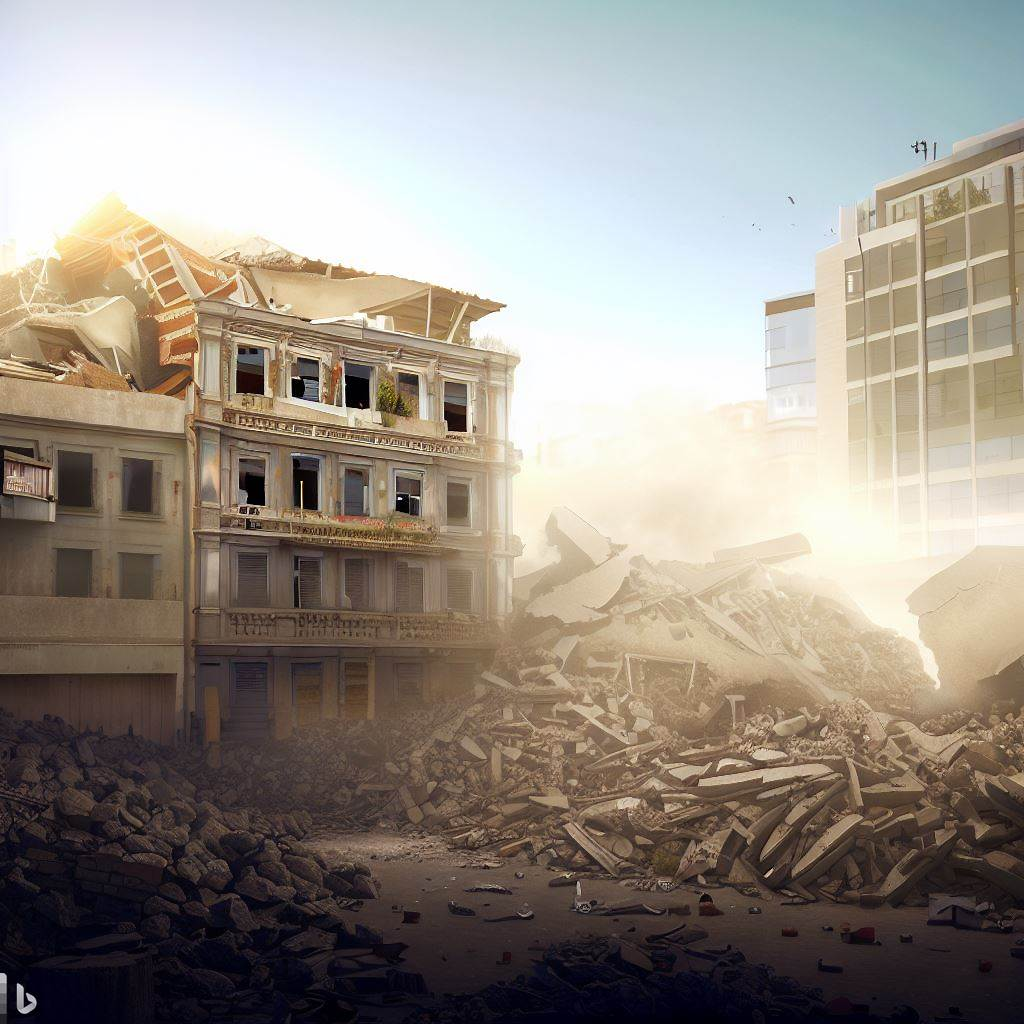

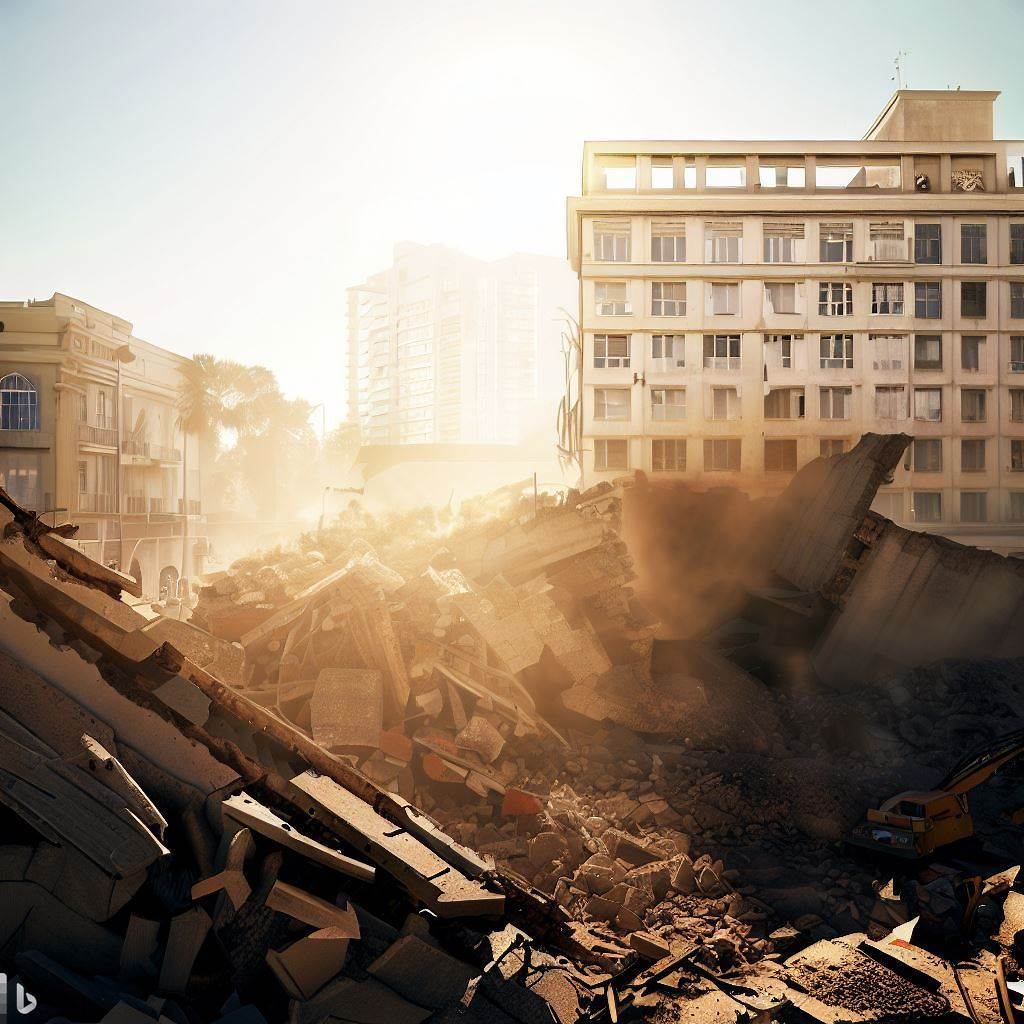

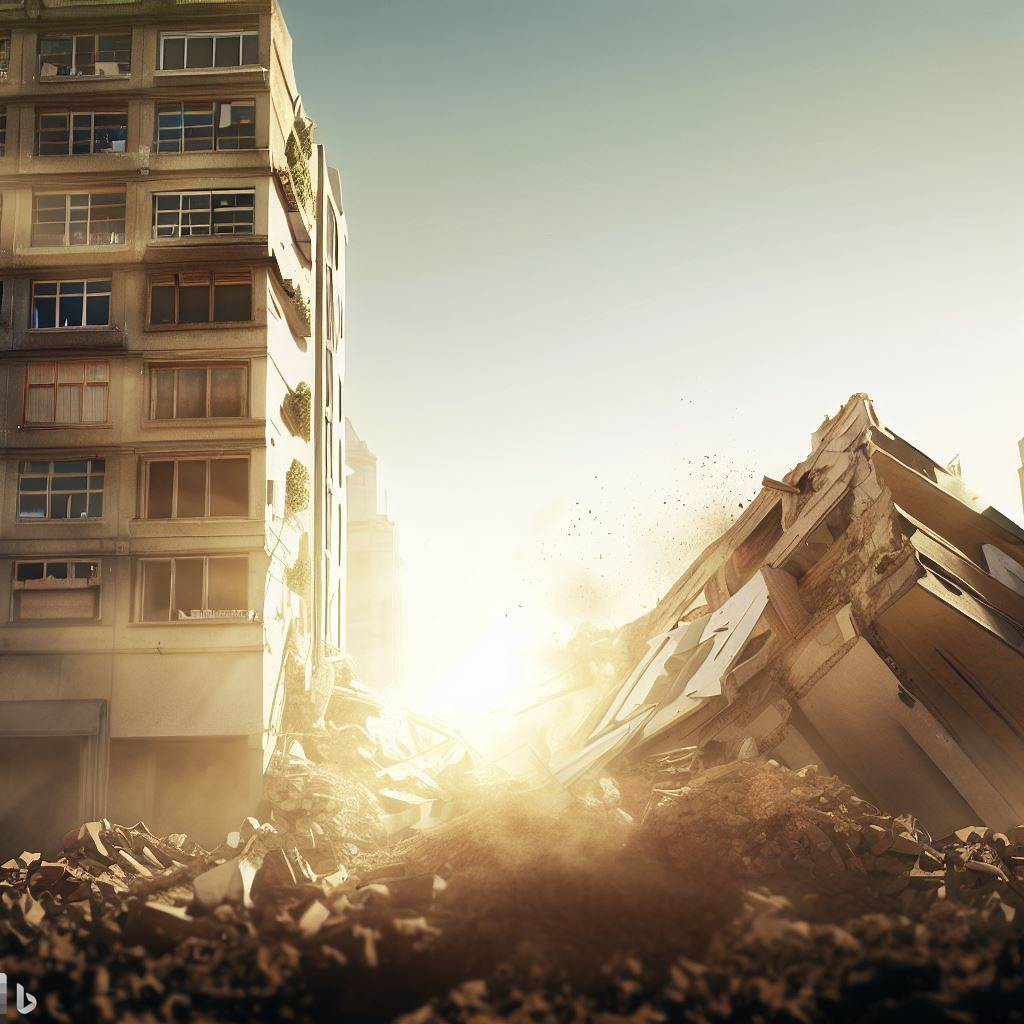

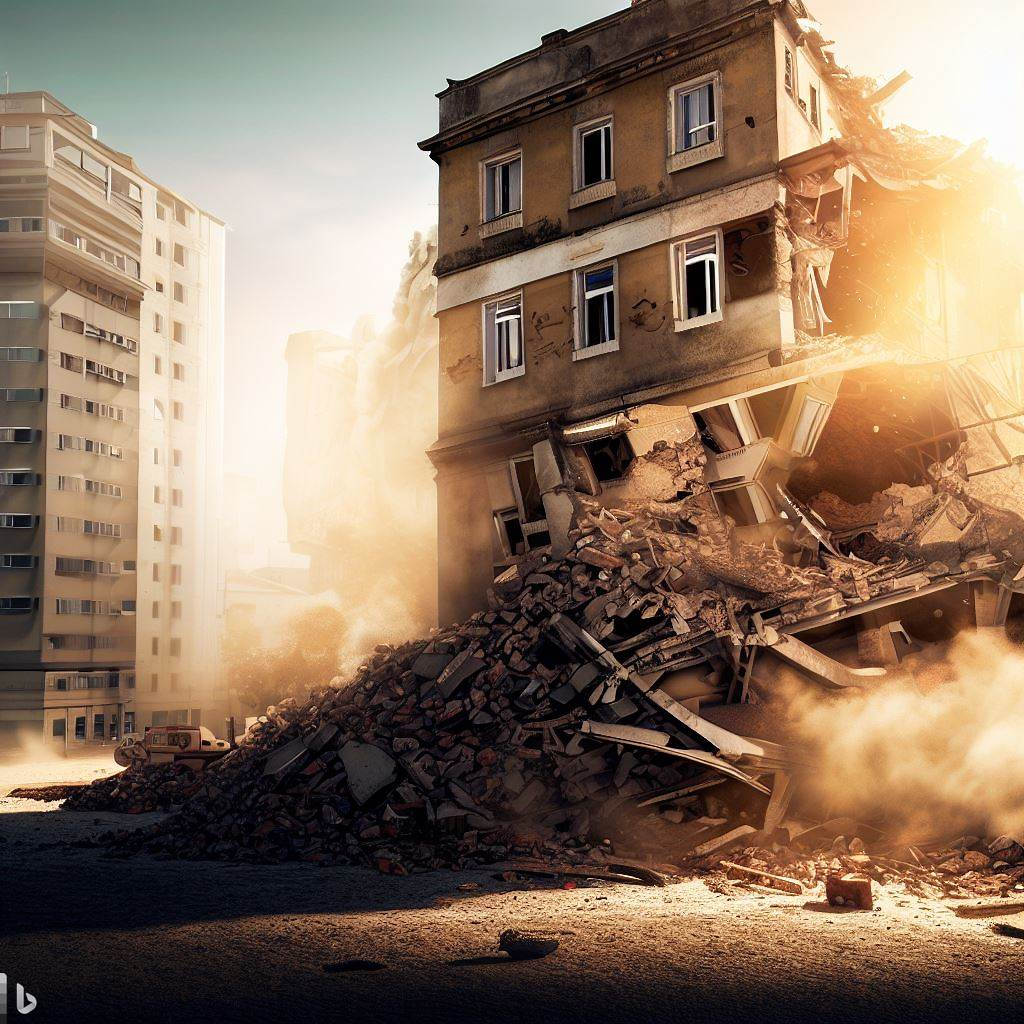

2023-07-25 21:54:02.057 | SUCCESS  | __main__:<module>:6 - News Image Generation process took 41.28823399543762 seconds!


In [41]:
# Testing with RS tchê
import time
ini = time.time()
news, _ = await generate_brazilian_state_images('Rio Grande do Sul')
final = time.time()-ini
logger.success(f"News Image Generation process took {final} seconds!")

In [42]:
news['sources']

'[1]: https://g1.globo.com/rs/rio-grande-do-sul/noticia/2023/07/25/fachada-de-predio-desmorona-em-porto-alegre-ninguem-ficou-ferido.ghtml "Fachada de prédio desmorona em Porto Alegre; ninguém ficou ferido | Rio ..."\n[2]: https://recordtv.r7.com/noticias "Leia as últimas notícias da rede de televisão – Record TV"\n[3]: https://agoranors.com/rs/ "Leia as últimas notícias do Rio Grande do Sul | Agora RS"\n[4]: https://noticias.uol.com.br/ "UOL Notícias | Notícias do Dia no Brasil e no Mundo"\n[5]: https://g1.globo.com/rs/rio-grande-do-sul/noticia/2023/07/25/grupo-do-g1-rs-no-whatsapp.ghtml "Veja como participar do grupo do g1 RS no WhatsApp e receba as notícias ..."\n\nOlá! Segue um resumo das últimas notícias do dia 25/07/2023 no Rio Grande do Sul:\n\n- A fachada de um prédio comercial em Porto Alegre desmoronou na manhã desta terça-feira (25). O local estava desocupado e ninguém ficou ferido. Mais tarde, um segundo desmoronamento atingiu o prédio ao lado do imóvel. A Secretaria Municip

2023-07-25 22:12:15.109 | INFO     | __main__:generate_brazilian_state_images:4 - Creating Bot...
2023-07-25 22:12:16.276 | SUCCESS  | __main__:generate_brazilian_state_images:6 - Bot Created!
2023-07-25 22:12:16.277 | INFO     | __main__:generate_brazilian_state_images:7 - Getting news for Bahia, for date 2023-07-25
2023-07-25 22:12:37.685 | SUCCESS  | __main__:generate_brazilian_state_images:10 - News report created!
2023-07-25 22:12:37.686 | INFO     | __main__:generate_brazilian_state_images:11 - Getting prompt for the news...
2023-07-25 22:12:47.922 | SUCCESS  | __main__:generate_brazilian_state_images:20 - Image prompt created!
2023-07-25 22:12:47.923 | INFO     | __main__:generate_brazilian_state_images:21 - Creating images...


Sending request...
Waiting for results...
........


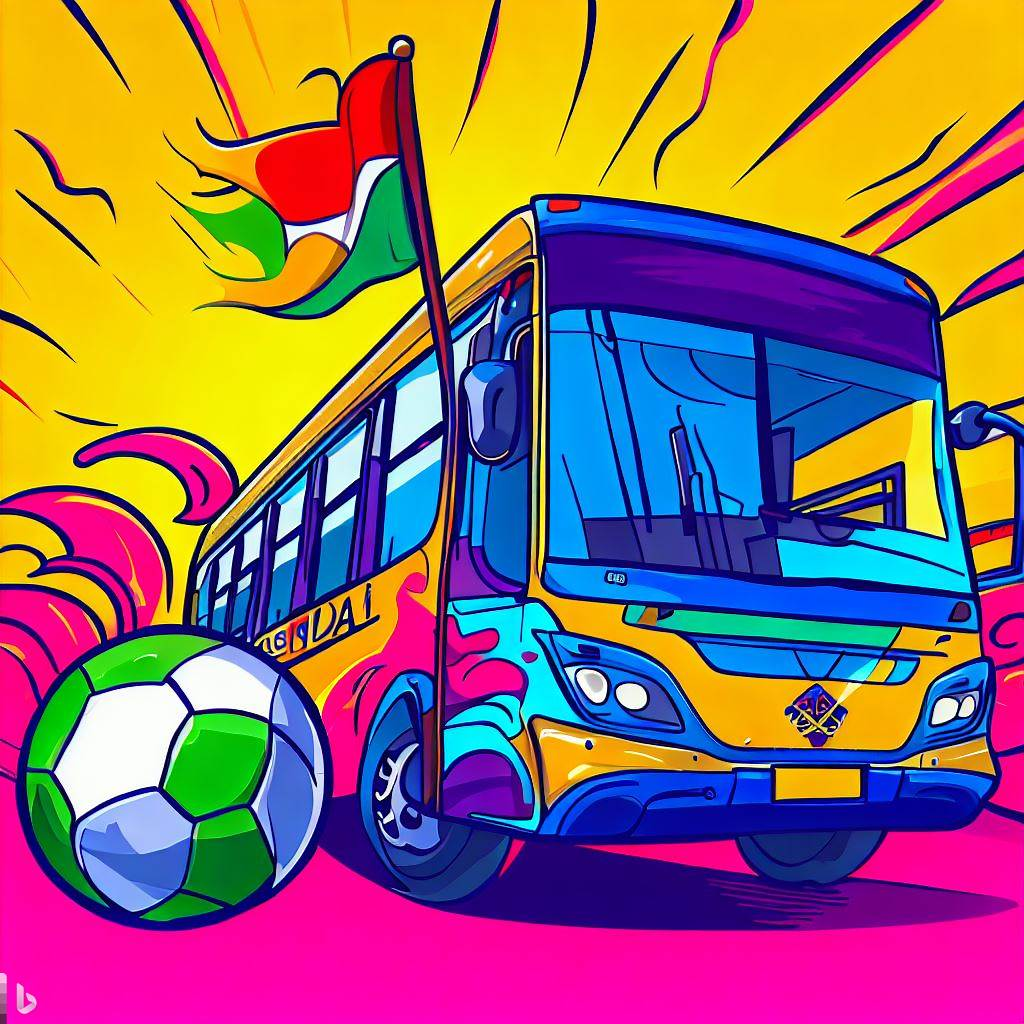

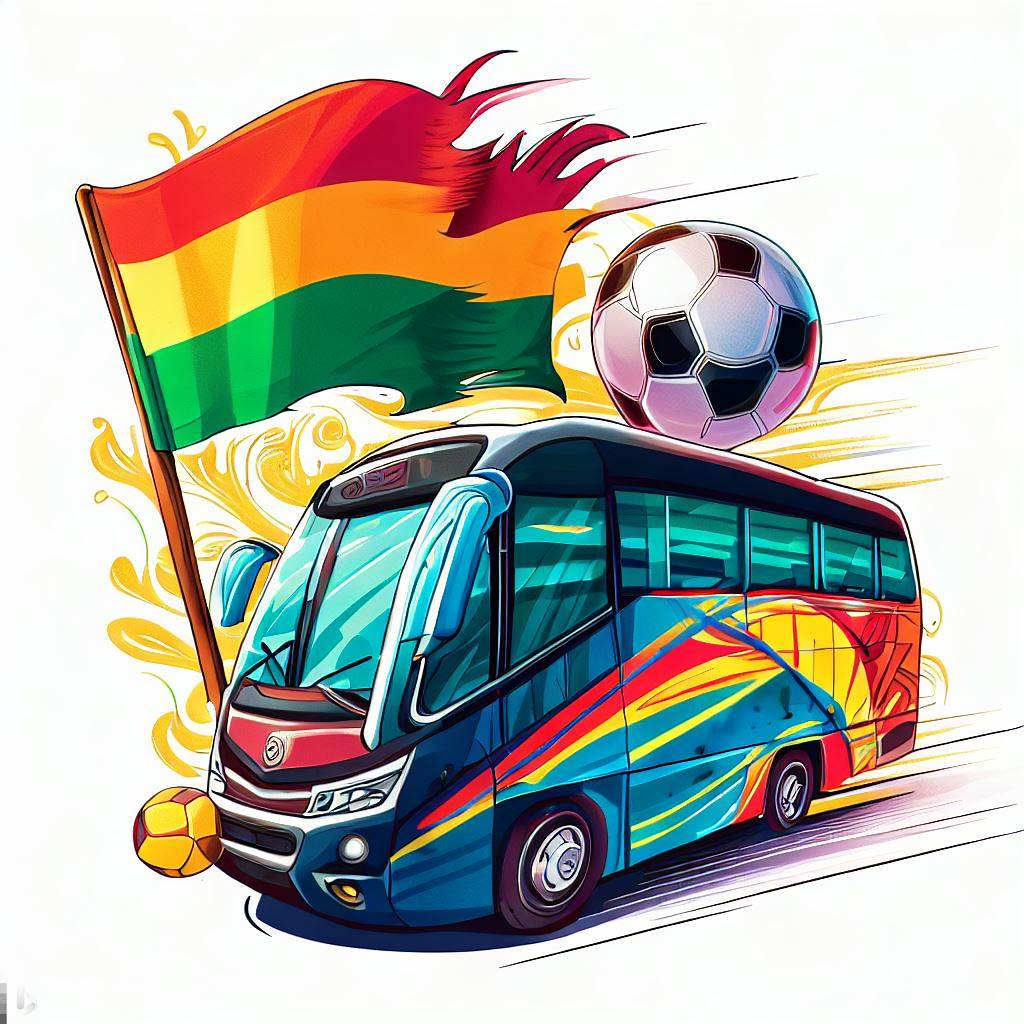

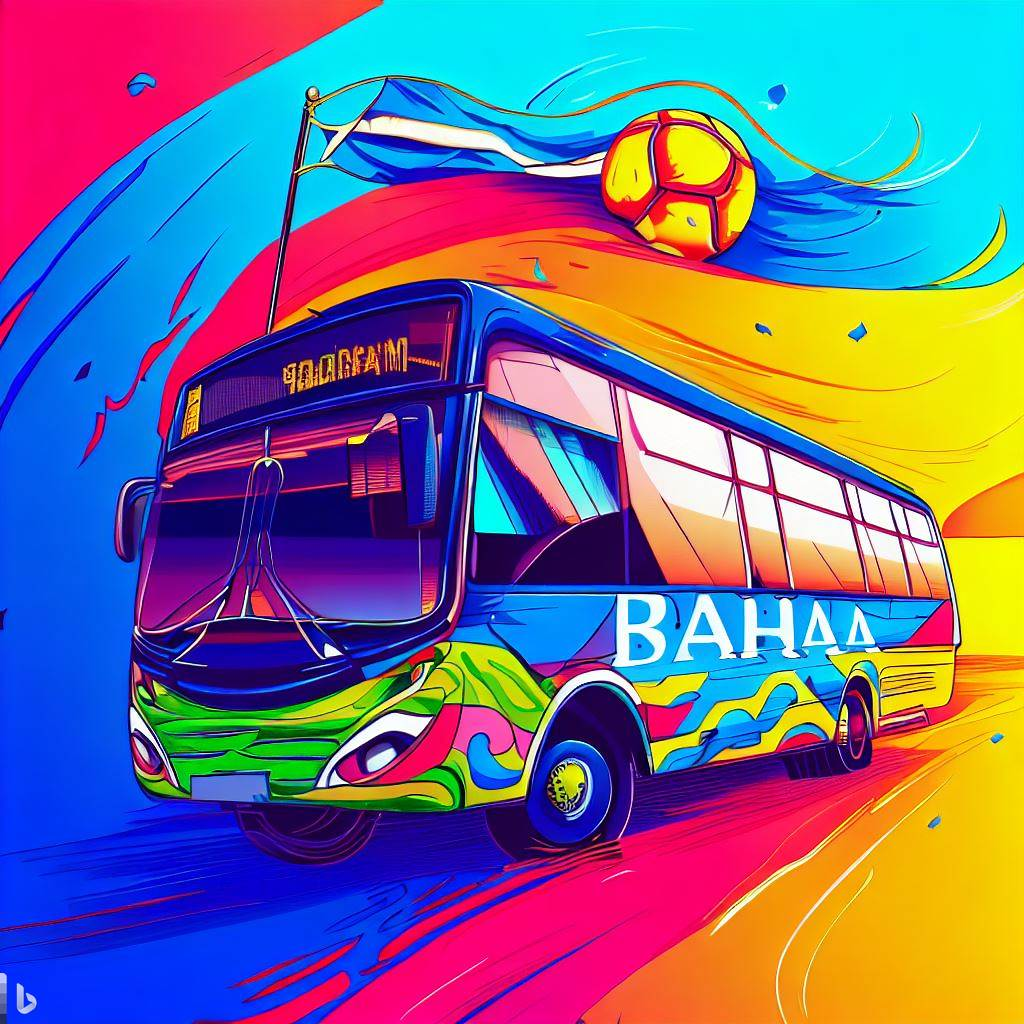

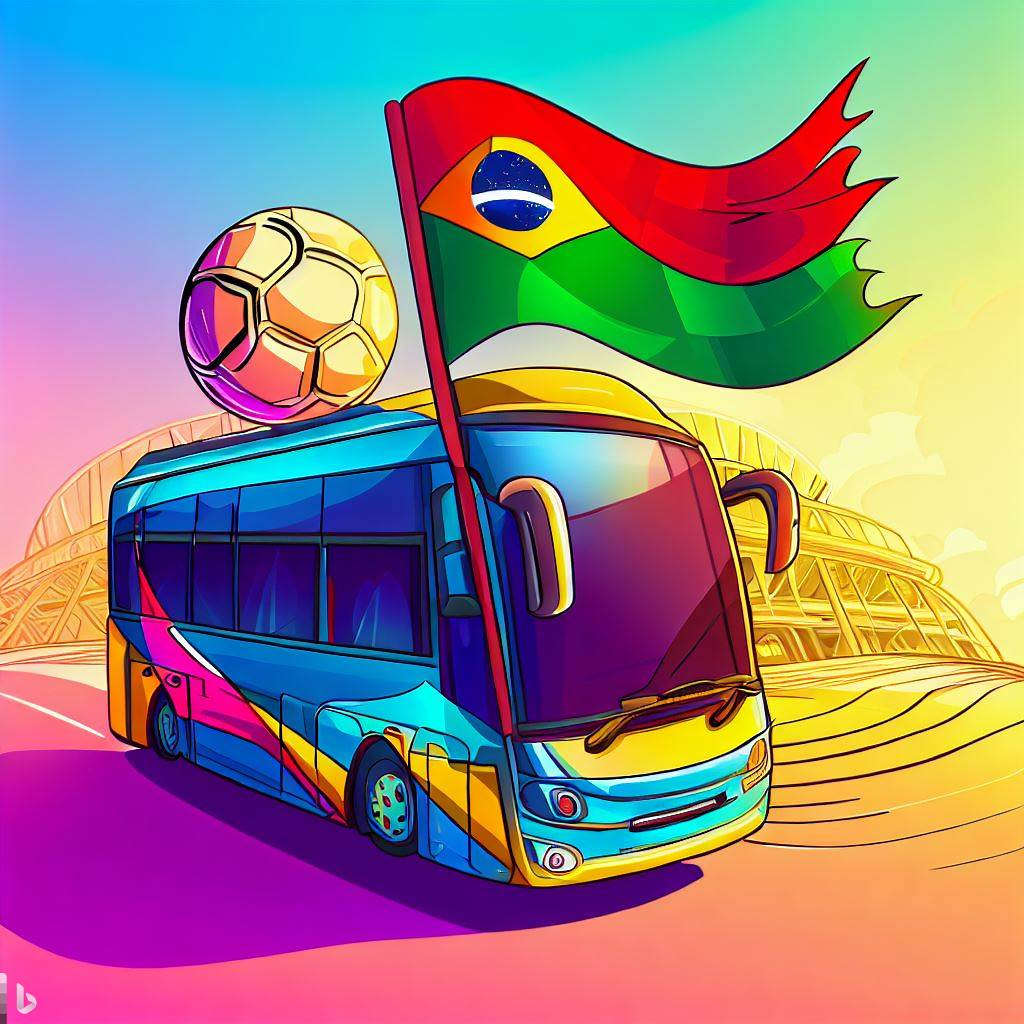

In [43]:
news, _ = await generate_brazilian_state_images('Bahia')

2023-07-25 22:13:01.776 | INFO     | __main__:generate_brazilian_state_images:4 - Creating Bot...
2023-07-25 22:13:02.810 | SUCCESS  | __main__:generate_brazilian_state_images:6 - Bot Created!
2023-07-25 22:13:02.811 | INFO     | __main__:generate_brazilian_state_images:7 - Getting news for Minas Gerais, for date 2023-07-25
2023-07-25 22:13:17.675 | SUCCESS  | __main__:generate_brazilian_state_images:10 - News report created!
2023-07-25 22:13:17.675 | INFO     | __main__:generate_brazilian_state_images:11 - Getting prompt for the news...
2023-07-25 22:13:29.873 | SUCCESS  | __main__:generate_brazilian_state_images:20 - Image prompt created!
2023-07-25 22:13:29.873 | INFO     | __main__:generate_brazilian_state_images:21 - Creating images...


Sending request...
Waiting for results...
........


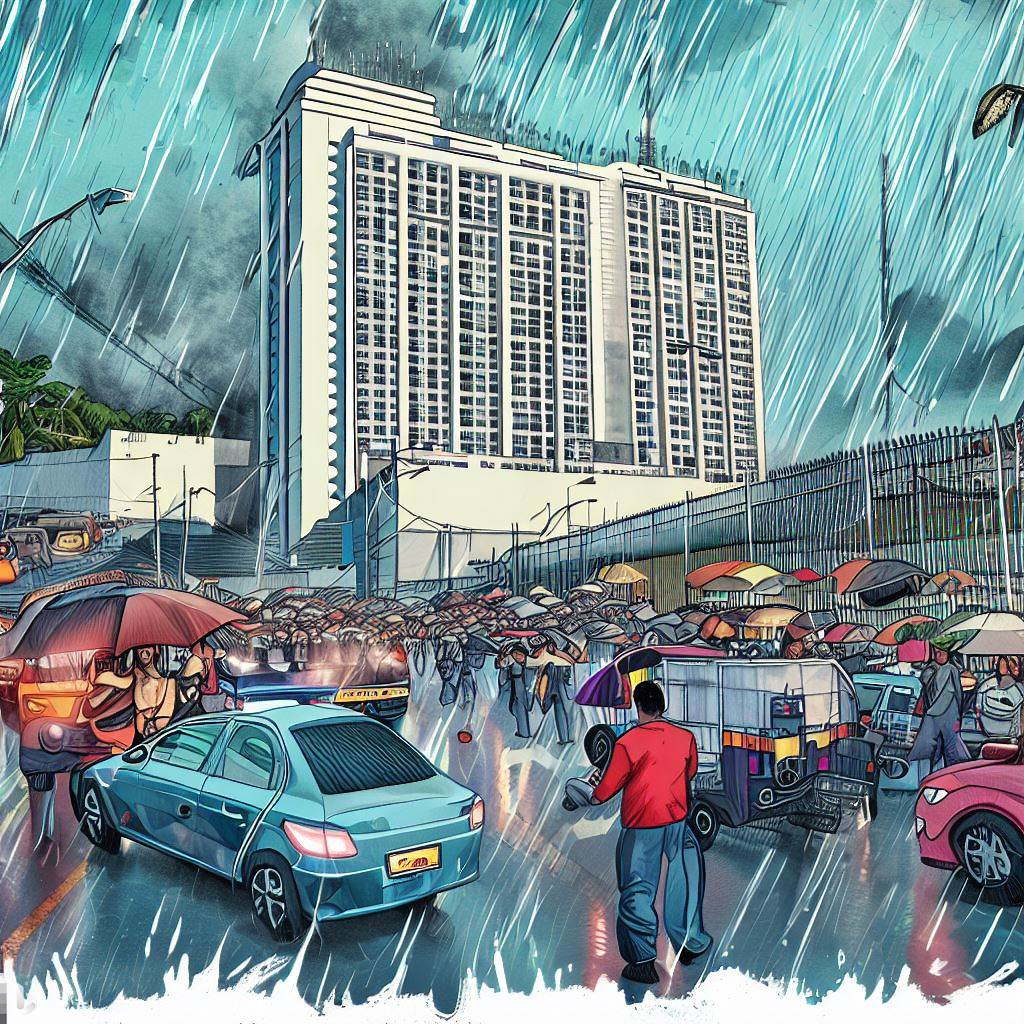

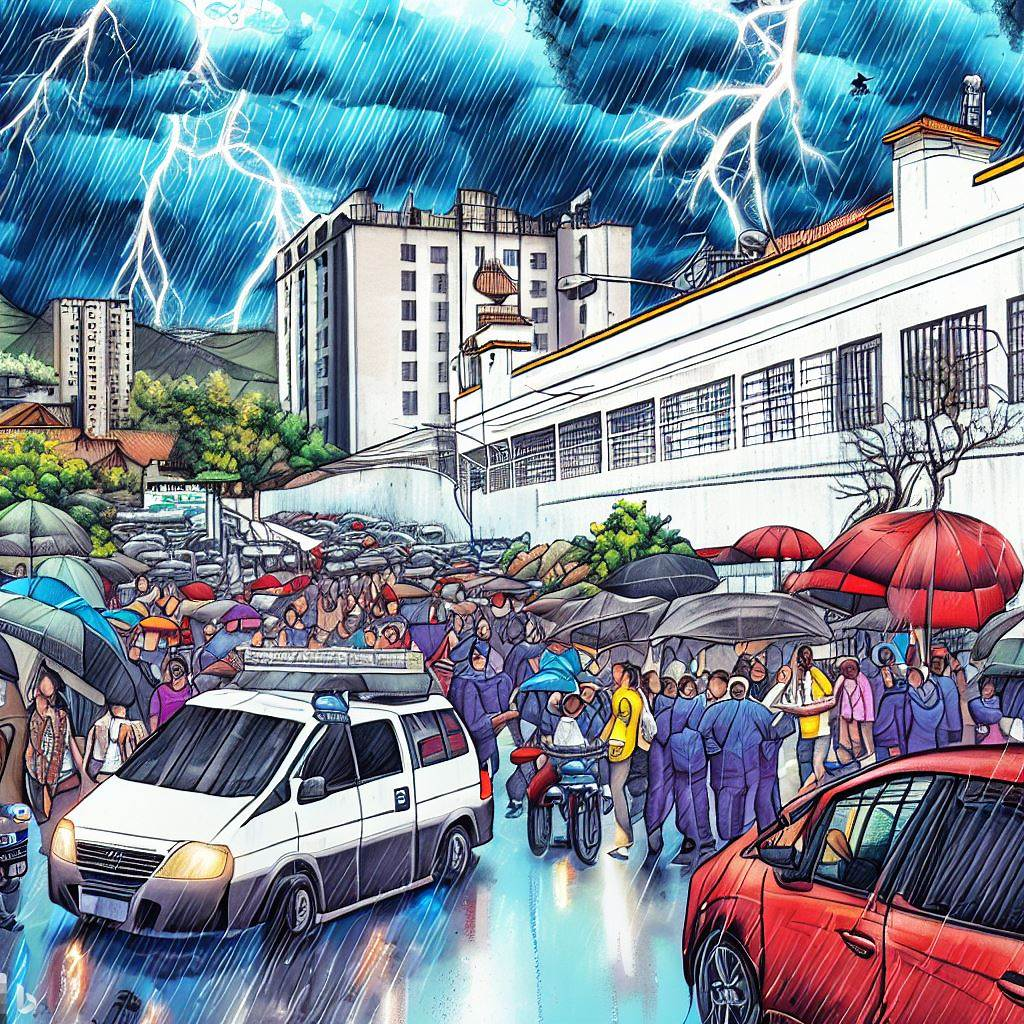

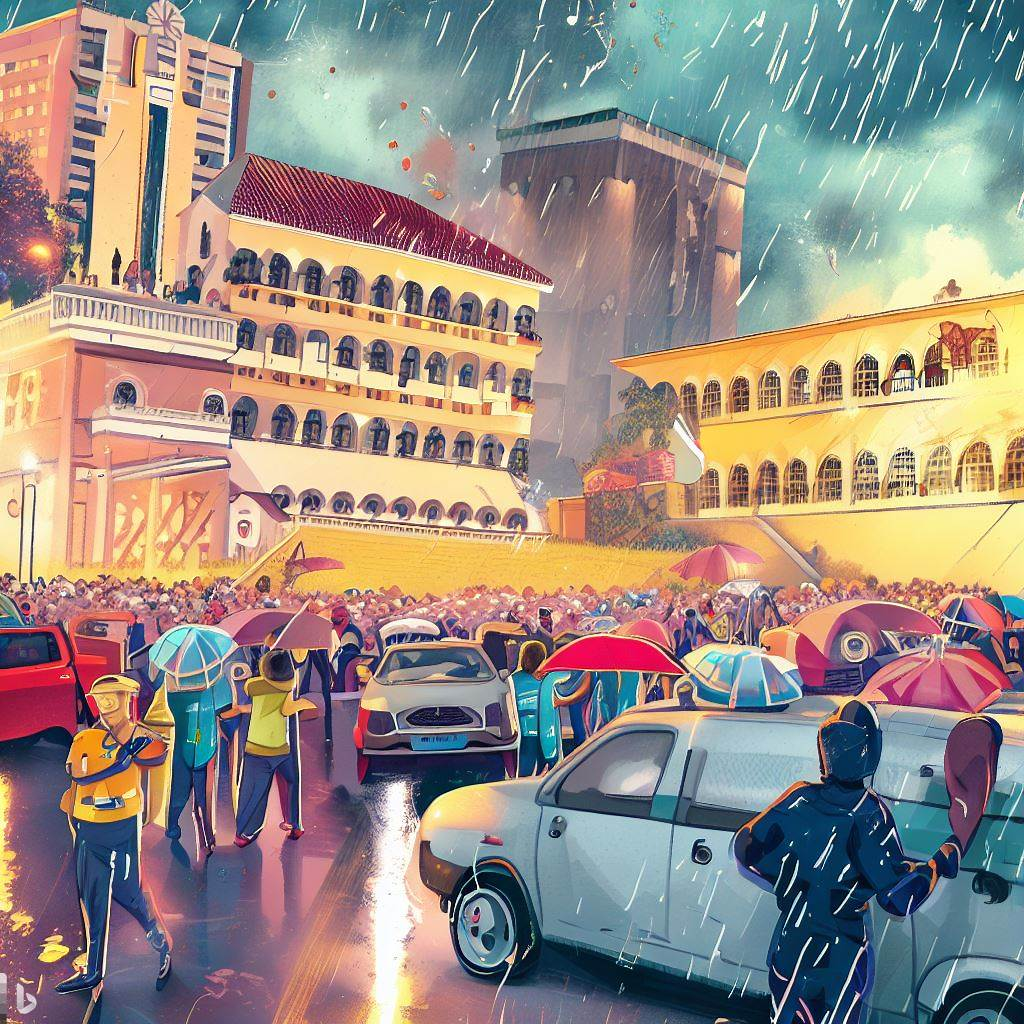

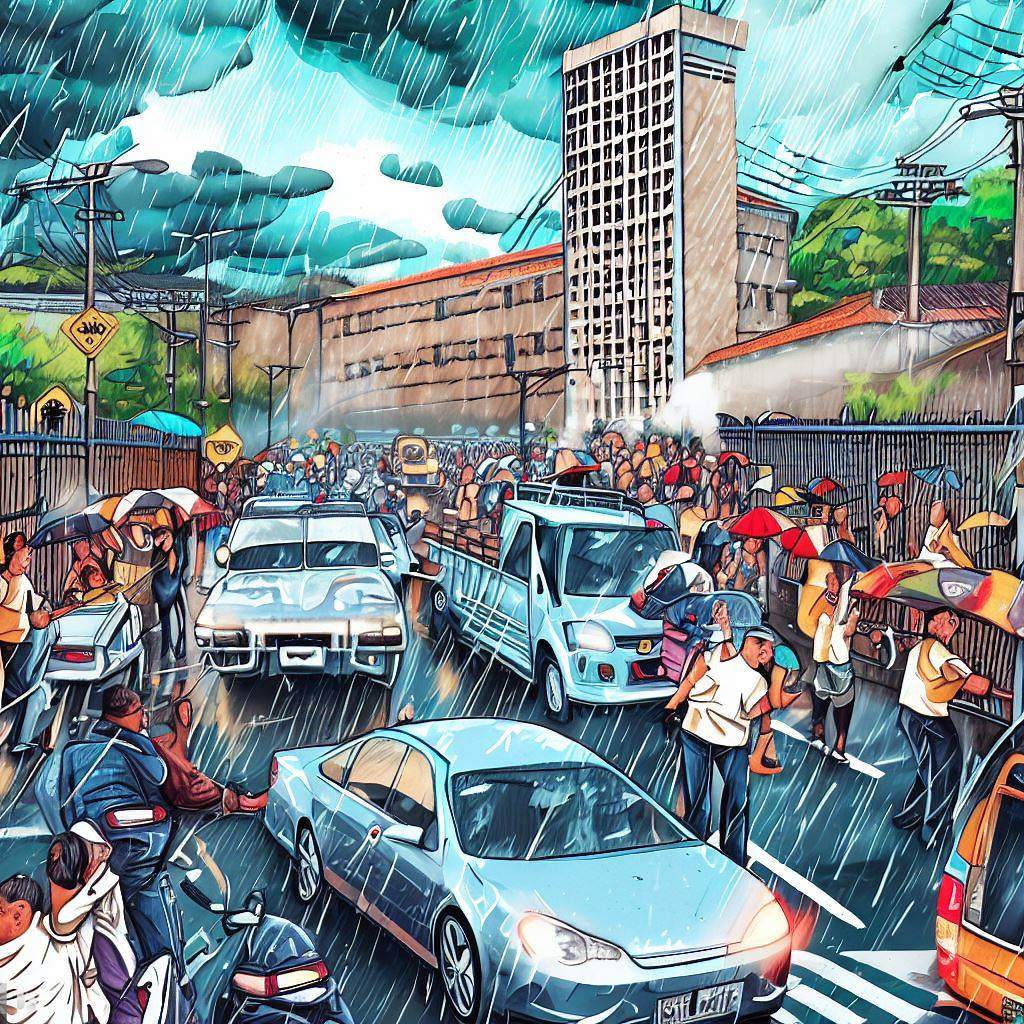

In [44]:
news, _ = await generate_brazilian_state_images('Minas Gerais')

2023-07-25 22:13:44.005 | INFO     | __main__:generate_brazilian_state_images:4 - Creating Bot...
2023-07-25 22:13:45.459 | SUCCESS  | __main__:generate_brazilian_state_images:6 - Bot Created!
2023-07-25 22:13:45.460 | INFO     | __main__:generate_brazilian_state_images:7 - Getting news for São Paulo, for date 2023-07-25
2023-07-25 22:14:00.534 | SUCCESS  | __main__:generate_brazilian_state_images:10 - News report created!
2023-07-25 22:14:00.536 | INFO     | __main__:generate_brazilian_state_images:11 - Getting prompt for the news...
2023-07-25 22:14:09.803 | SUCCESS  | __main__:generate_brazilian_state_images:20 - Image prompt created!
2023-07-25 22:14:09.804 | INFO     | __main__:generate_brazilian_state_images:21 - Creating images...


Sending request...
Waiting for results...
........


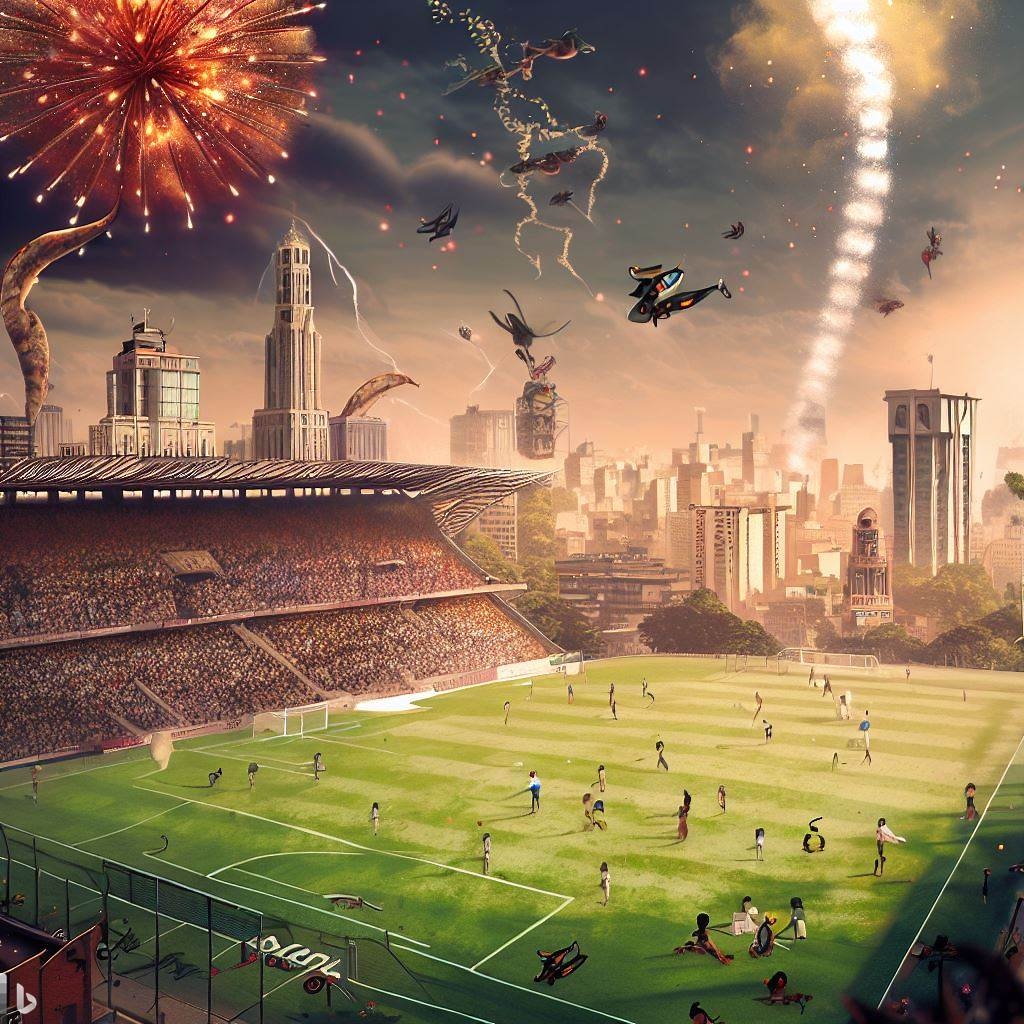

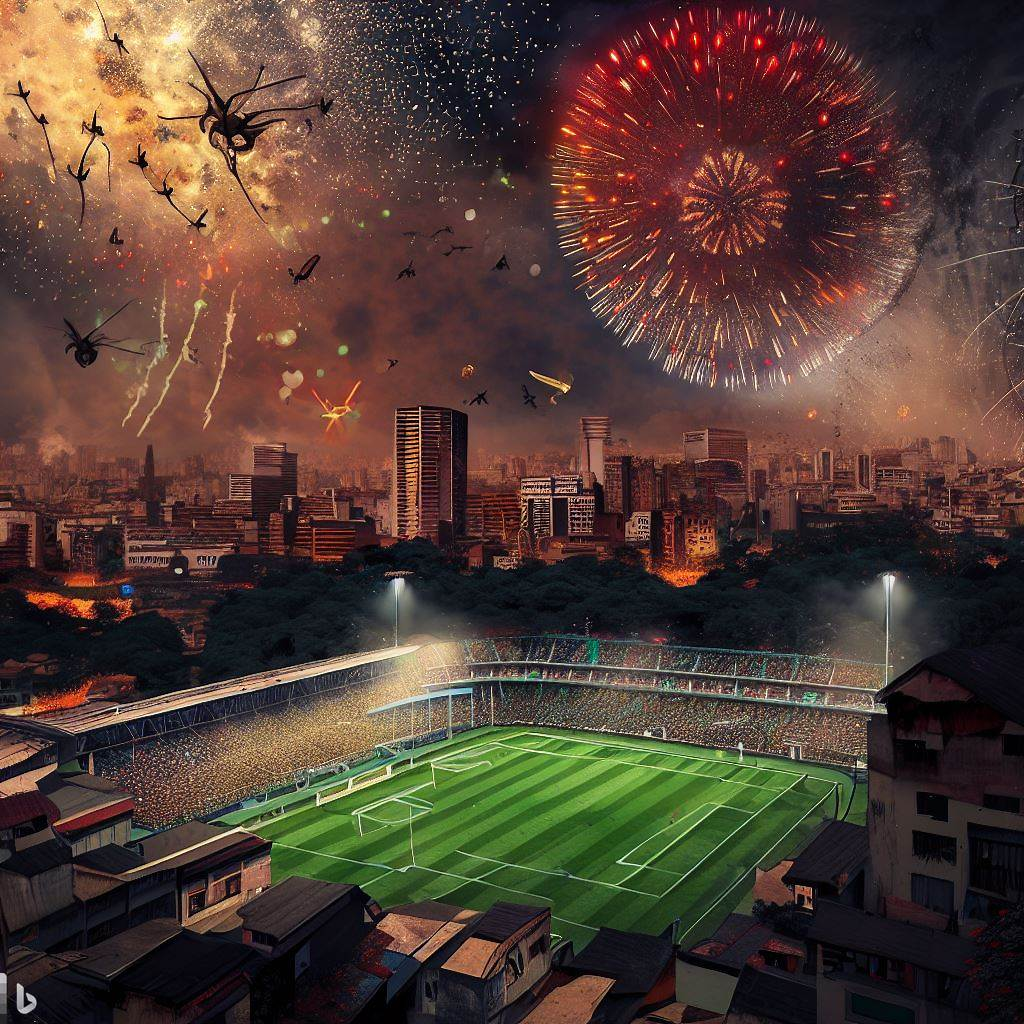

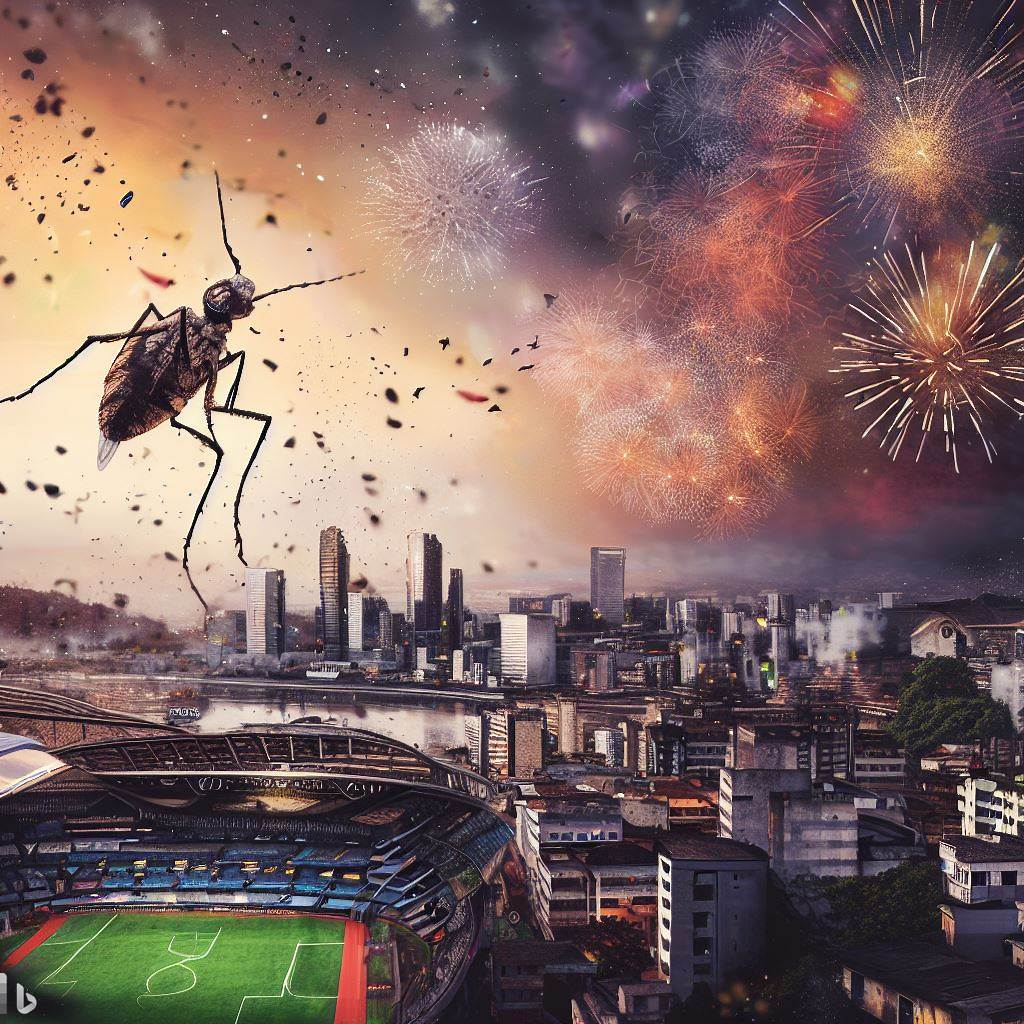

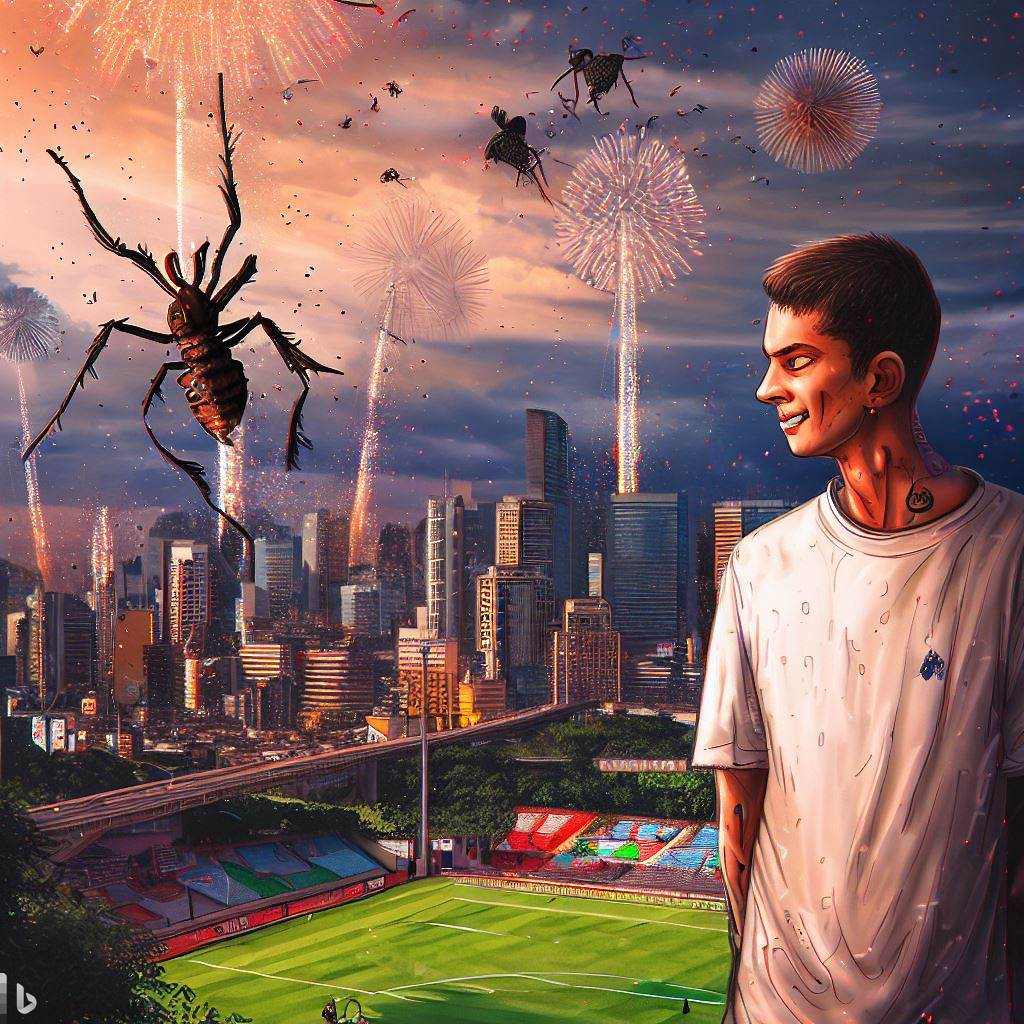

In [45]:
news, _ = await generate_brazilian_state_images('São Paulo')

2023-07-25 22:22:17.301 | INFO     | __main__:generate_brazilian_state_images:4 - Creating Bot...
2023-07-25 22:22:18.474 | SUCCESS  | __main__:generate_brazilian_state_images:6 - Bot Created!
2023-07-25 22:22:18.476 | INFO     | __main__:generate_brazilian_state_images:7 - Getting news for Amazônia, for date 2023-07-25
2023-07-25 22:22:36.292 | SUCCESS  | __main__:generate_brazilian_state_images:10 - News report created!
2023-07-25 22:22:36.293 | INFO     | __main__:generate_brazilian_state_images:11 - Getting prompt for the news...
2023-07-25 22:22:46.391 | SUCCESS  | __main__:generate_brazilian_state_images:20 - Image prompt created!
2023-07-25 22:22:46.391 | INFO     | __main__:generate_brazilian_state_images:21 - Creating images...


Sending request...
Waiting for results...
.........


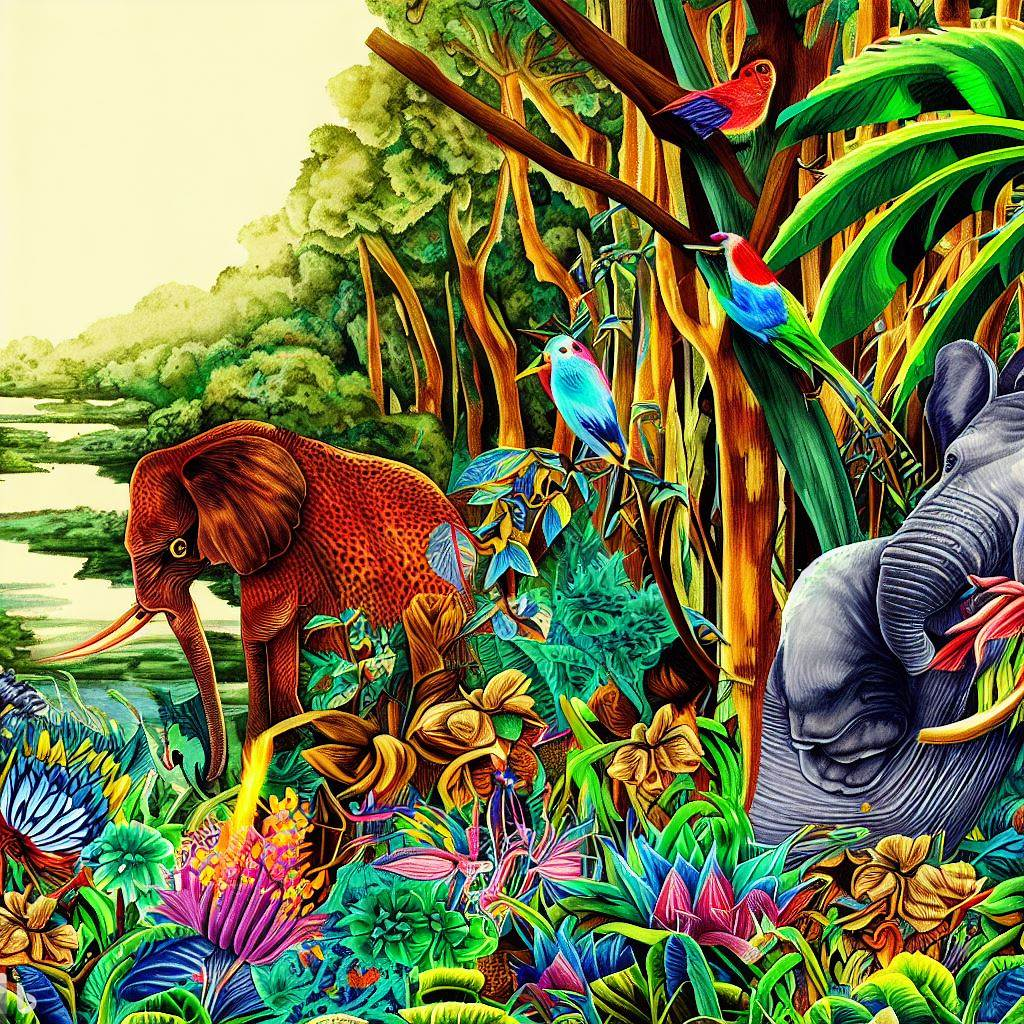

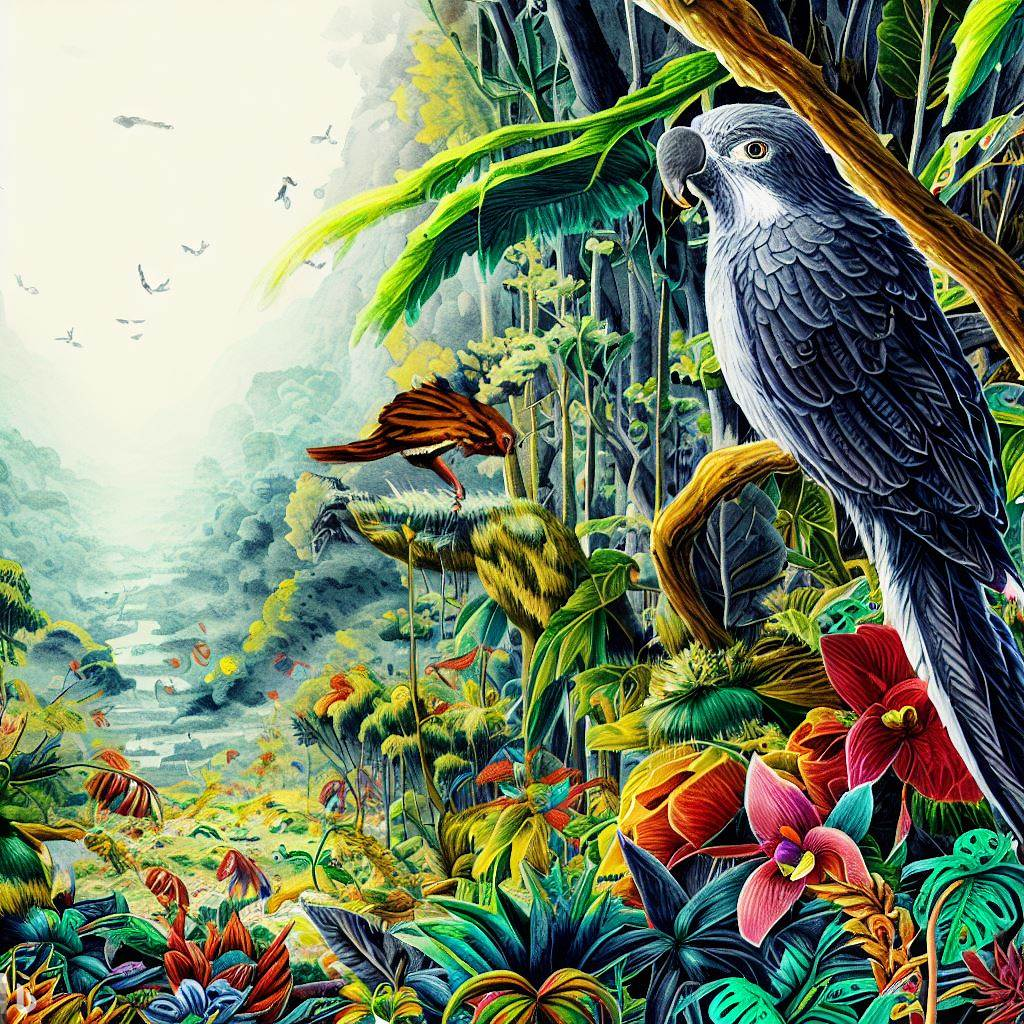

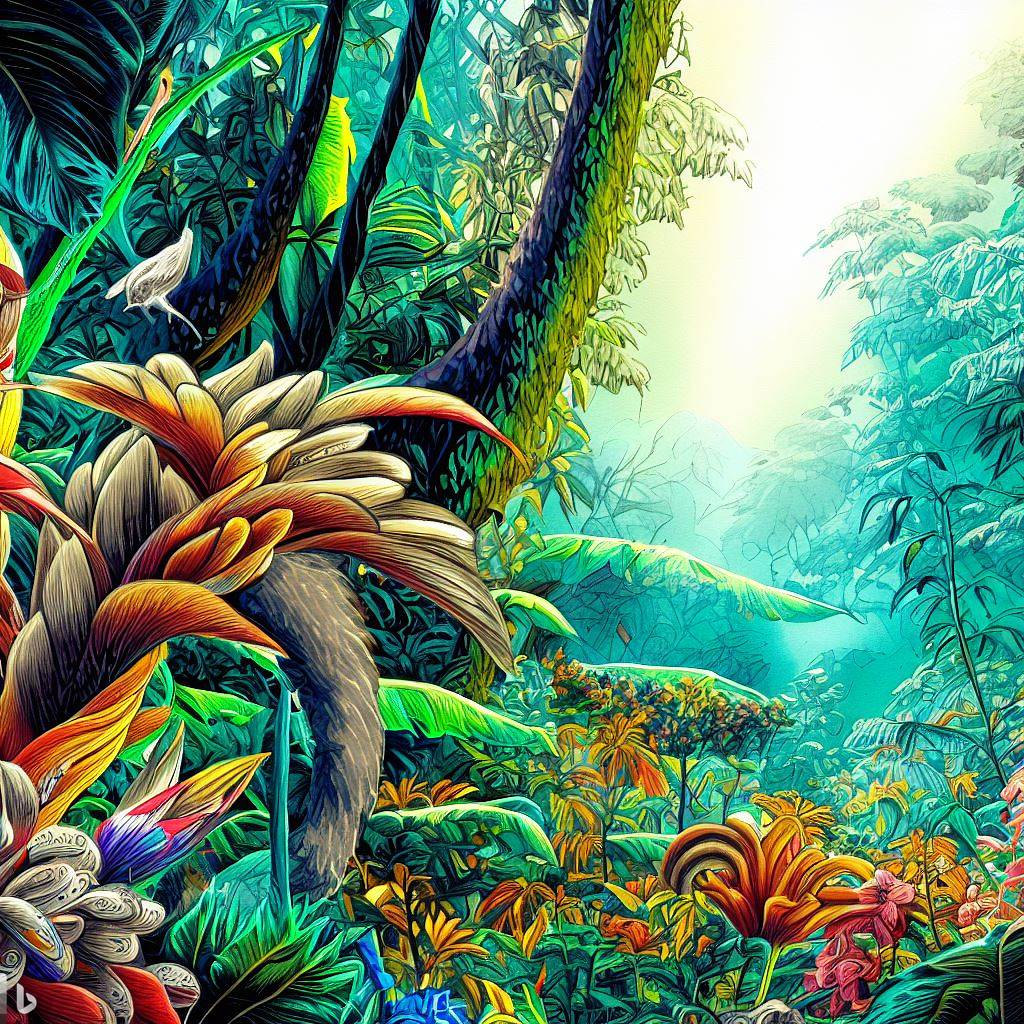

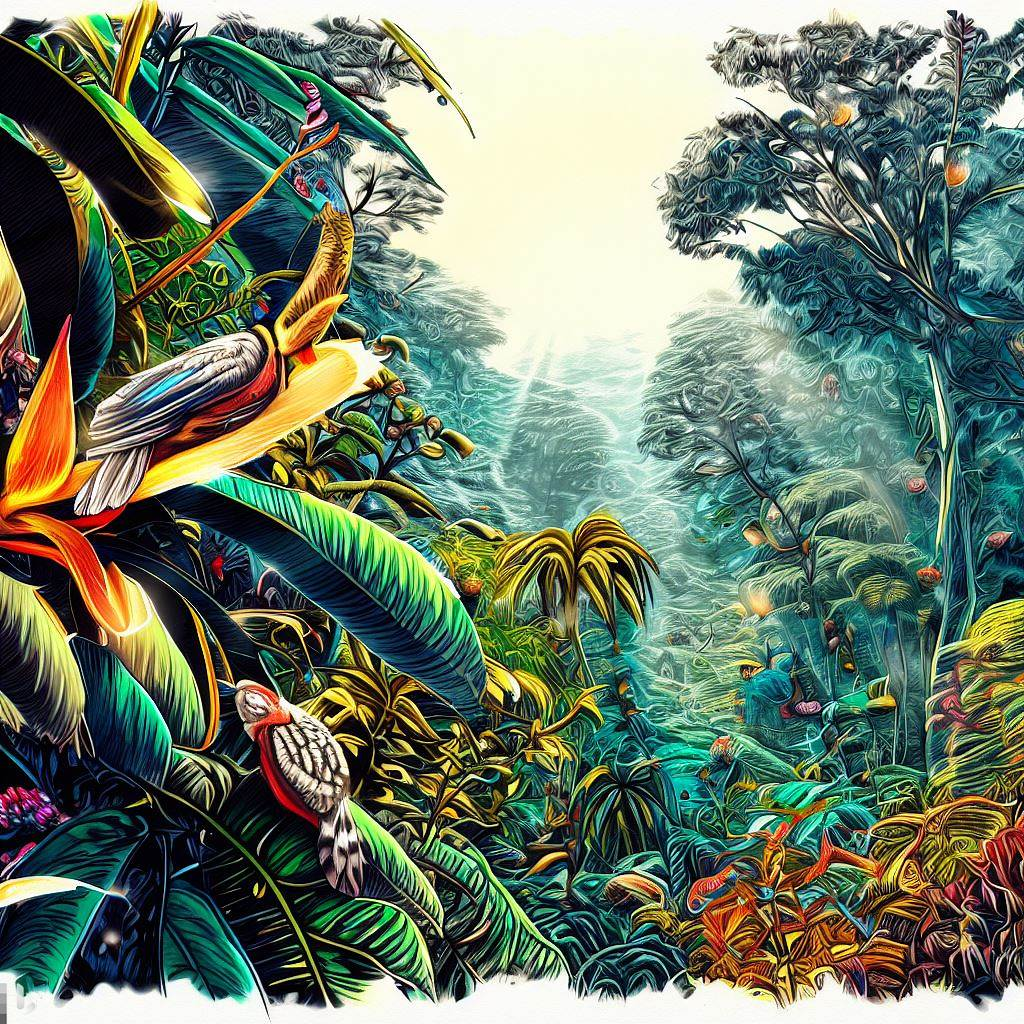

In [47]:
news, _ = await generate_brazilian_state_images('Amazônia')

2023-07-25 22:58:47.956 | INFO     | __main__:generate_brazilian_state_images:4 - Creating Bot...
2023-07-25 22:58:48.909 | SUCCESS  | __main__:generate_brazilian_state_images:6 - Bot Created!
2023-07-25 22:58:48.910 | INFO     | __main__:generate_brazilian_state_images:7 - Getting news for Roraima, for date 2023-07-25
2023-07-25 22:59:04.385 | SUCCESS  | __main__:generate_brazilian_state_images:10 - News report created!
2023-07-25 22:59:04.386 | INFO     | __main__:generate_brazilian_state_images:11 - Getting prompt for the news...
2023-07-25 22:59:15.612 | SUCCESS  | __main__:generate_brazilian_state_images:20 - Image prompt created!
2023-07-25 22:59:15.613 | INFO     | __main__:generate_brazilian_state_images:21 - Creating images...


Sending request...
Waiting for results...
........


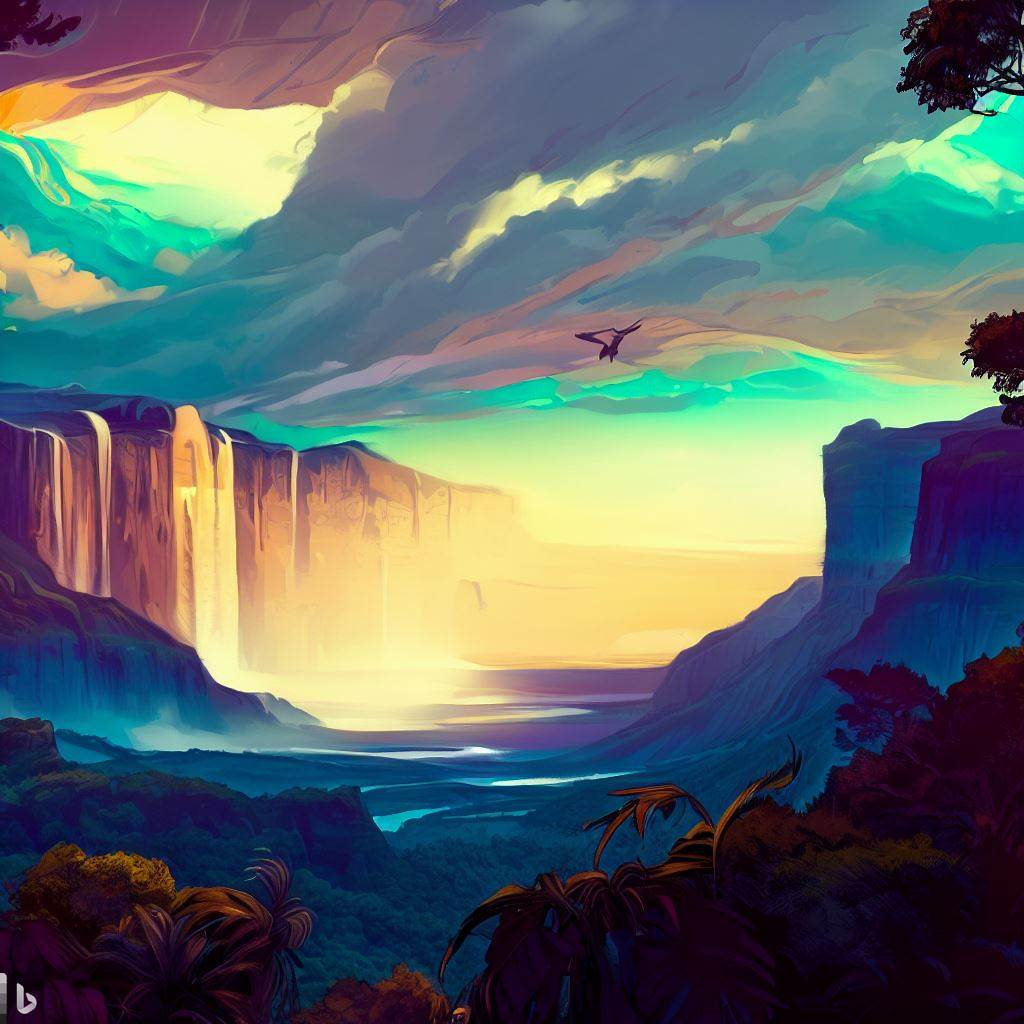

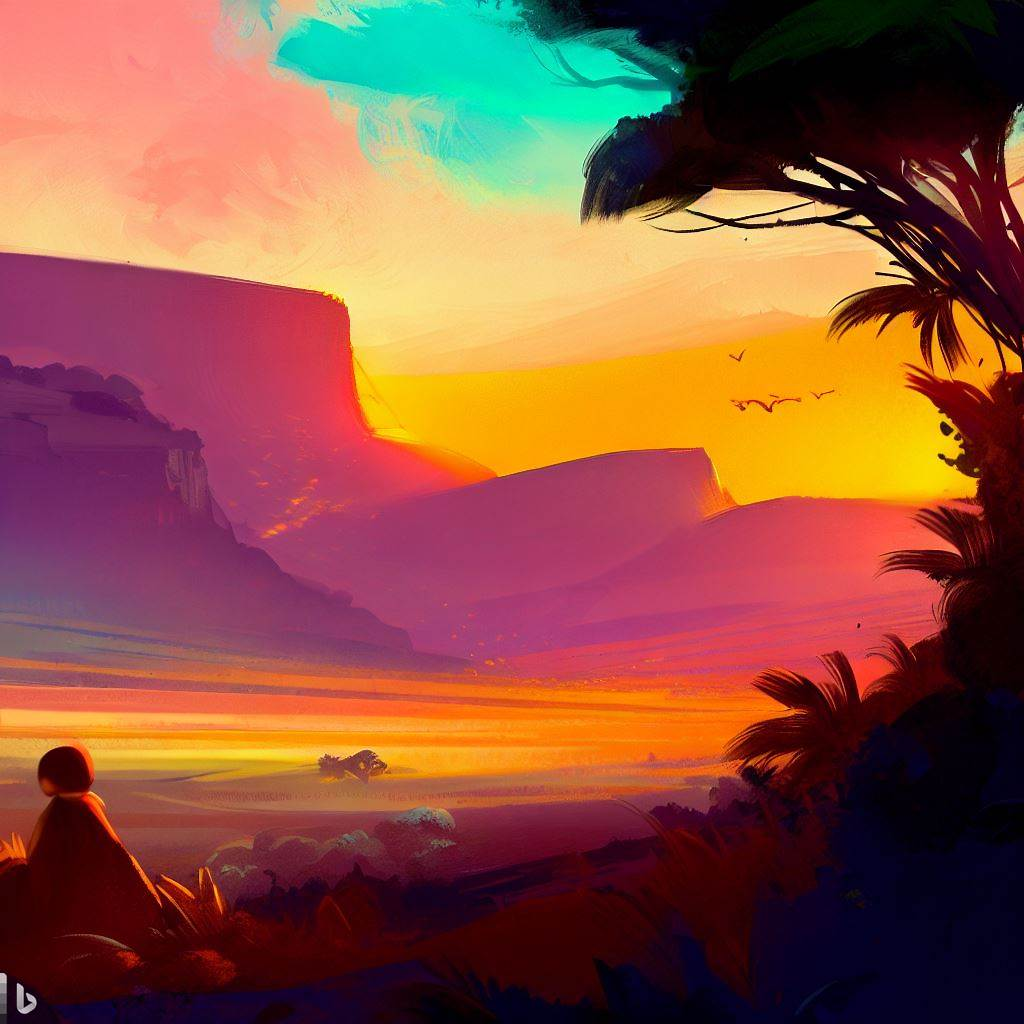

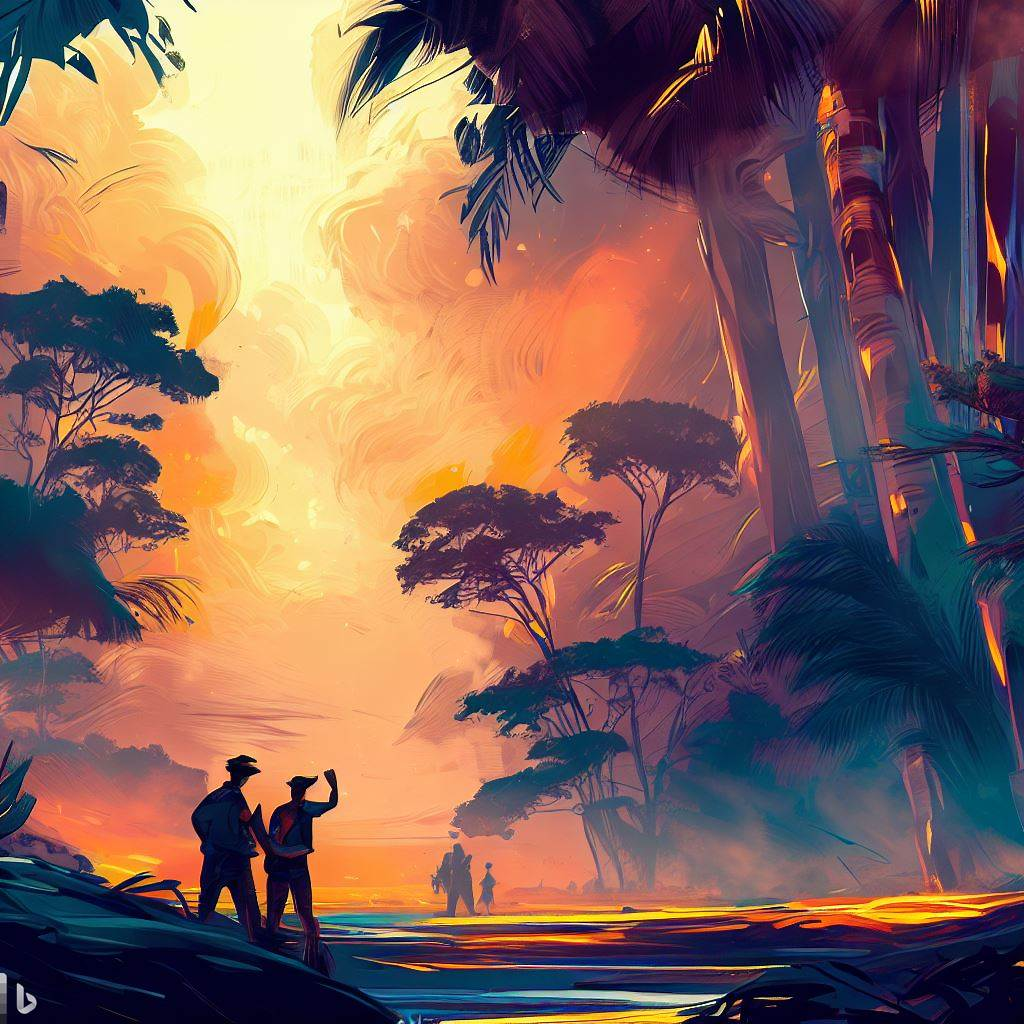

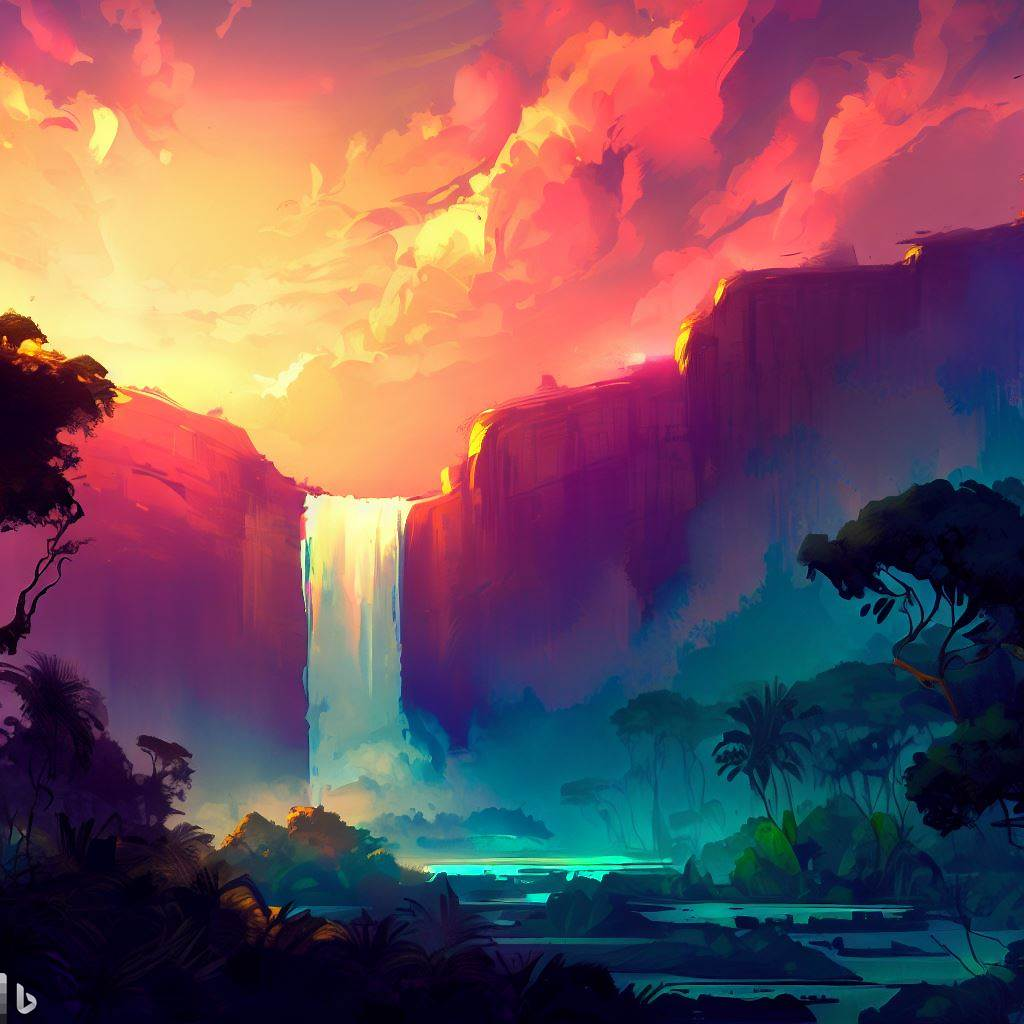

In [50]:
news, _ = await generate_brazilian_state_images('Roraima')

2023-07-25 23:02:17.984 | INFO     | __main__:generate_brazilian_state_images:4 - Creating Bot...
2023-07-25 23:02:19.298 | SUCCESS  | __main__:generate_brazilian_state_images:6 - Bot Created!
2023-07-25 23:02:19.299 | INFO     | __main__:generate_brazilian_state_images:7 - Getting news for Acre, for date 2023-07-25
2023-07-25 23:02:41.275 | SUCCESS  | __main__:generate_brazilian_state_images:10 - News report created!
2023-07-25 23:02:41.276 | INFO     | __main__:generate_brazilian_state_images:11 - Getting prompt for the news...
2023-07-25 23:02:51.867 | SUCCESS  | __main__:generate_brazilian_state_images:20 - Image prompt created!
2023-07-25 23:02:51.868 | INFO     | __main__:generate_brazilian_state_images:21 - Creating images...


Sending request...
Waiting for results...
........


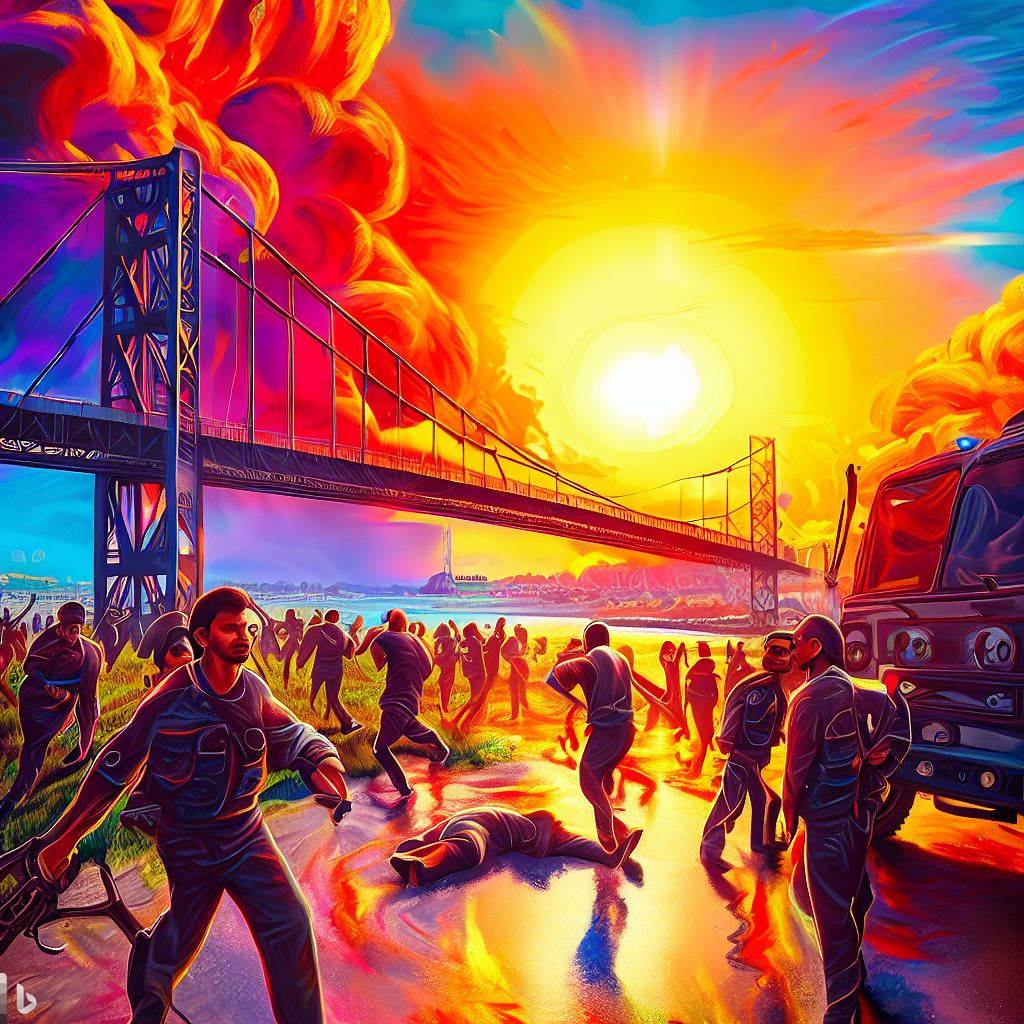

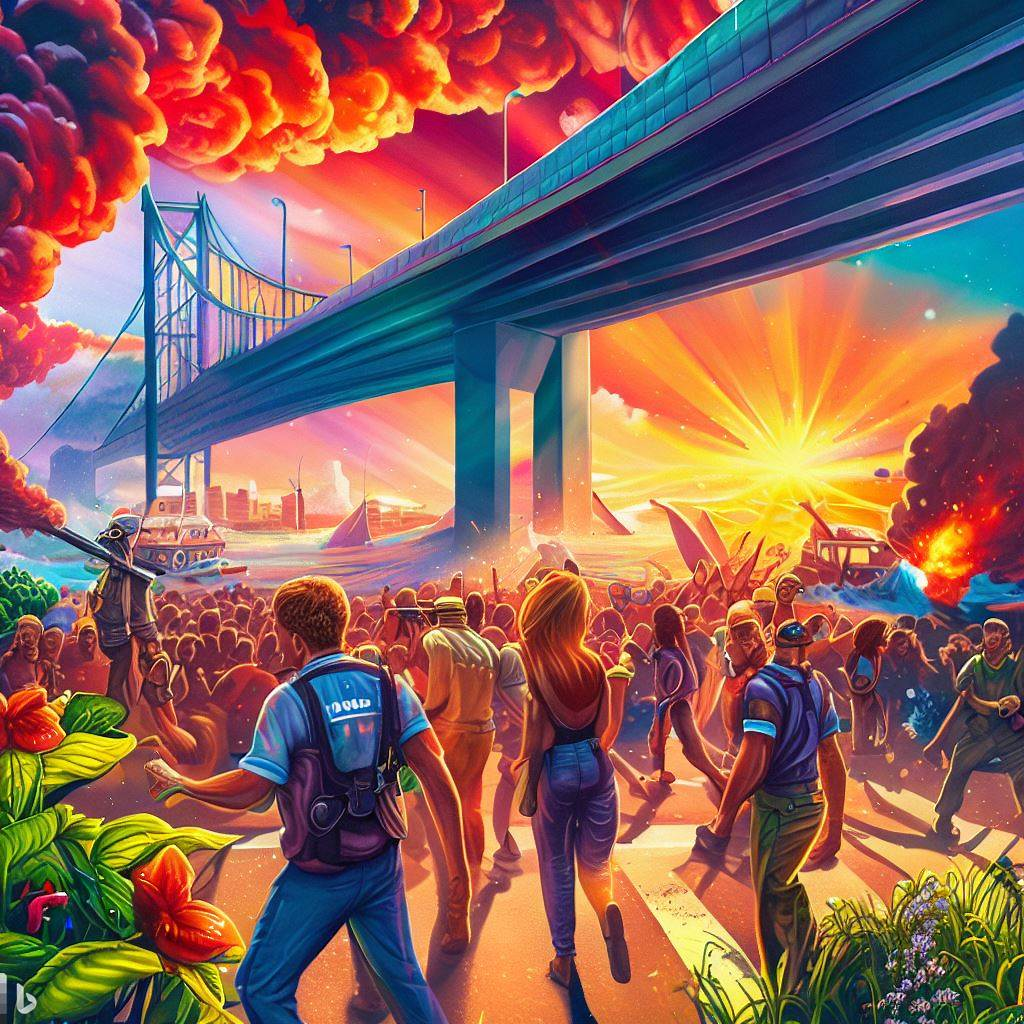

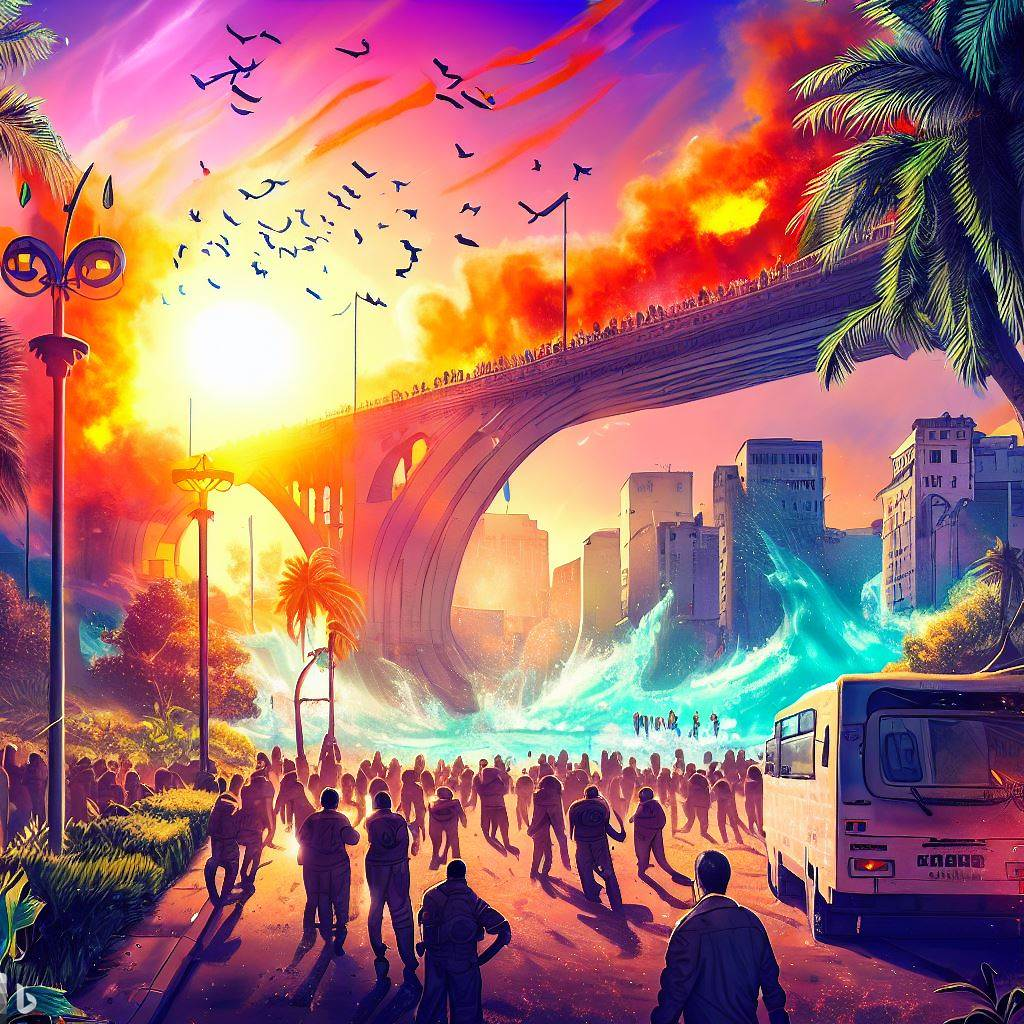

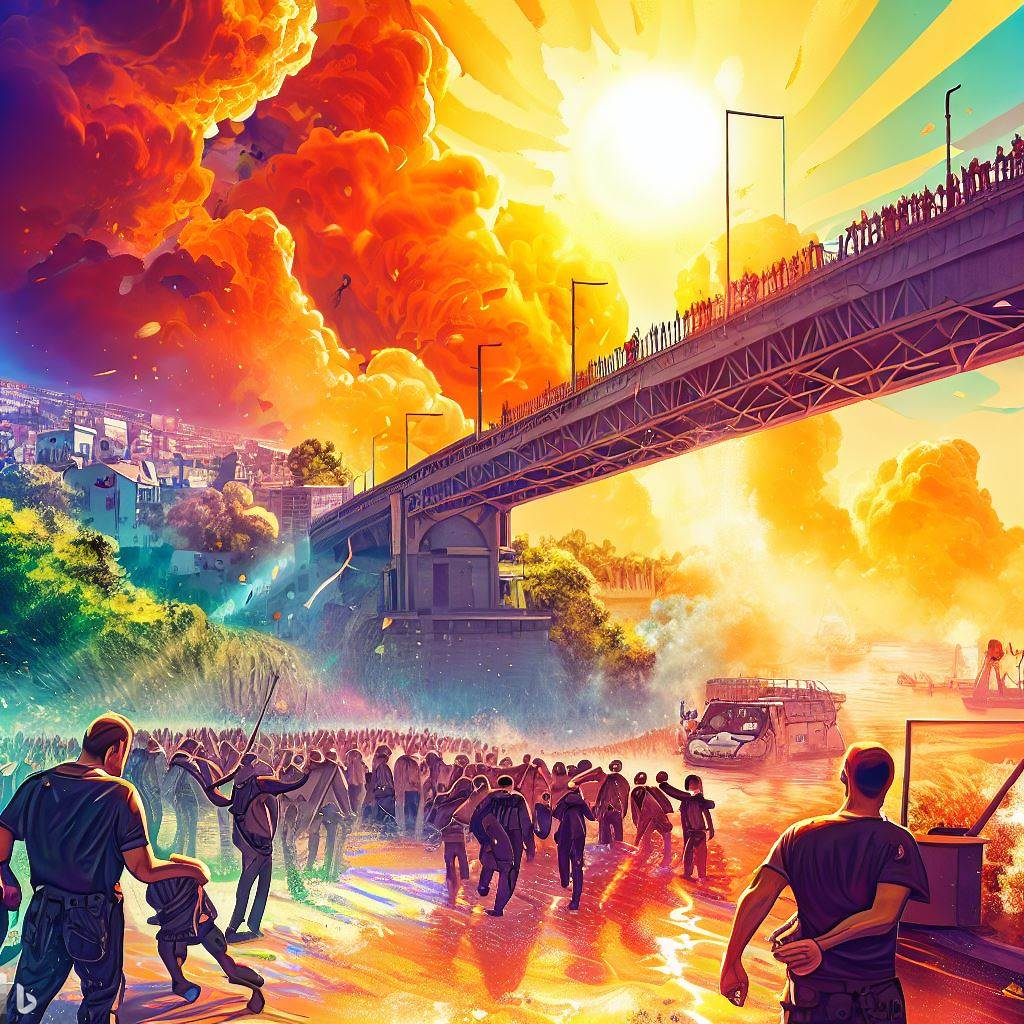

In [51]:
news, _ = await generate_brazilian_state_images('Acre')

In [52]:
news

{'text': 'Claro! Aqui está um resumo das últimas notícias do Acre em 25 de julho de 2023:\n\n- Colecionadores de armas, atiradores e caçadores crescem 72,6% no Acre[^1^]\n- Interdição da Ponte Metálica deixa trânsito lento e causa engarrafamentos no centro de Rio Branco[^1^]\n- Marcha para Exu acontece em Rio Branco no mês de agosto[^1^]\n- Vídeo registra casais agredindo brutalmente mulher em Manoel Urbano, no interior[^1^]\n- Tempo quente e ensolarado neste sábado no Acre, aponta previsão[^1^]\n- Audiência do MPAC vai debater fechamento do U:verse e destino dos alunos da instituição[^1^]\n- Acusado de matar ex-mulher a tiros ao lado dos filhos vira réu em processo[^1^]\n- Unimed abre oportunidades para psicólogos e fonoaudiólogos com salários competitivos[^1^]\n- Suspeito de assalto é preso após cair de moto ao tentar fugir da polícia em Rio Branco[^1^]\n- Prefeitura de Rio Branco vai aos tribunais derrubar greve da educação[^1^]\n- Prefeitura comunica fim de atendimento até 22h no B